<a href="https://colab.research.google.com/github/Ruymelo10/ProjetoTAGDI/blob/master/Projeto_Ciencia_de_Dados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* O nosso trabalho utiliza de uma API, a football-data, para retirar 
informações sobre os times e as partidas dos times da Premier League (Liga de futebol inglesa), nas temporadas 2018-2019, 2019-2020 e 2020-2021, para que possamos fazer análises desses times.

Grupo: Rodrigo Albuquerque e Ruy Ovídio

#Projeto 1

## Coleta de dados

In [ ]:
import http.client
import json
import pandas as pd
from pandas import json_normalize
from tabulate import tabulate
#FAZENDO A CONEXÃO COM A API E COLOCANDO OS DADOS NO DATAFRAME
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'c6a7c804a45446b5a641af92ac107535' }
connection.request('GET', '/v2/competitions/PL/matches?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2018 = pd.DataFrame(json_normalize(response['matches']))
data2018['ano'] = 19 #2018-2019
connection.request('GET', '/v2/competitions/PL/matches?season=2019', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2019 = pd.DataFrame(json_normalize(response['matches']))
data2019['ano'] = 20 #2019-2020
connection.request('GET', '/v2/competitions/PL/matches?season=2020', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2020 = pd.DataFrame(json_normalize(response['matches']))
data2020['ano'] = 21 #2020-2021
frames = [data2018,data2019,data2020]
dataMatches = pd.concat(frames) #DATAFRAME COM OS DADOS DAS PARTIDAS
dataMatches['totalGoals'] = dataMatches['score.fullTime.awayTeam'] + dataMatches['score.fullTime.homeTeam']
connection.request('GET', '/v2/competitions/PL/teams?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2018 = pd.DataFrame(json_normalize(response['teams'])) #2018-2019
connection.request('GET', '/v2/competitions/PL/teams?season=2019', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2019 = pd.DataFrame(json_normalize(response['teams'])) #2019-2020
connection.request('GET', '/v2/competitions/PL/teams?season=2020', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2020 = pd.DataFrame(json_normalize(response['teams'])) #2020-2021
frames = [dataTeams2018,dataTeams2019,dataTeams2020]
dataTeams = pd.concat(frames) #DATAFRAME COM OS DADOS DAS EQUIPES
dataTeams.drop_duplicates(subset ='id',keep = 'first', inplace = True)
print(tabulate(dataMatches.head(), headers='keys', tablefmt='psql')) #IMPRIMINDO O HEAD DO DATAFRAME DE PARTIDAS, COM UMA FORMATAÇÃO PARA MELHOR ANÁLISE
print(tabulate(dataTeams.head(), headers='keys', tablefmt='psql')) #IMPRIMINDO O HEAD DO DATAFRAME DE TIMES, COM UMA FORMATAÇÃO PARA MELHOR ANÁLISE

+----+--------+----------------------+----------+------------+----------------+----------------+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------------+------------------+--------------------------+-------------------------------------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+----------------------------+----------------------------+----------------------------+----------------------------+---------------+-----------------------+---------------+---------------------------+-------+--------------+
|    |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          | referee

* Criamos um Crawler para pegar informações de Overall (Média da força dos jogadores) de cada time no jogo FIFA, dos anos referentes aos dados que conseguimos na API, visto que, como os dados do jogo simulam a realidade, podem servir como referência para verificarmos quais times são mais fortes ou mais fracos

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
#Config do crawler
from bs4 import BeautifulSoup
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

use options instead of chrome_options

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

use options instead of chrome_options



In [ ]:
#crawler
names = []
overalls = []
yearList = []
years = [19,20,21]
for year in years:
  url = "https://www.fifaindex.com/pt-br/teams/fifa" + str(year) + "/?league=13&order=desc"
  driver.get(url)
  content = driver.page_source
  soup = BeautifulSoup(content)
  table = soup.find('table', attrs={'class':'table table-striped table-teams'})
  for a in table.findAll('tr'):
    time = a
    nomeTd = time.find('td', attrs={'data-title':'Nome'})
    if nomeTd != None:
      nome = nomeTd.find('a').text
    overallTd = time.find('td', attrs={'data-title':'GER'})
    if overallTd != None:
      overall = overallTd.find('span').text
    names.append(nome)
    overalls.append(overall)
    yearList.append(year)
overallsDf = pd.DataFrame({'name': names, 'overall': overalls, 'year': yearList})
overallsDf.drop_duplicates(keep='first',inplace=True)
teamId = (overallsDf.name
          .apply(lambda x: dataTeams[dataTeams.name.str.contains(x)]['id'])
          .bfill(axis=1)
          .iloc[:, 0])
overallsDf = pd.concat([overallsDf, teamId], axis=1)
overallsDf.columns = ['name','overall','year','teamId']
overallsDf.drop(columns='name', inplace=True)
dataMatches = pd.merge(dataMatches, overallsDf,left_on=['homeTeam.id','ano'],right_on=['teamId','year'], how='outer')
dataMatches.drop(columns={'teamId','year'}, inplace=True)
dataMatches.rename(columns={'overall': 'homeTeamOverall'}, inplace=True)
dataMatches = pd.merge(dataMatches, overallsDf,left_on=['awayTeam.id','ano'],right_on=['teamId','year'], how='outer')
dataMatches.drop(columns={'teamId','year'}, inplace=True)
dataMatches.rename(columns={'overall': 'awayTeamOverall'}, inplace=True)

In [ ]:
#Colocando o overall Medio de cada time no fifa dentro do dataframe de times
overallsDf['overall'] = overallsDf['overall'].astype('int64')
overMedio = overallsDf.groupby('teamId')['overall'].mean()
dataTeams = pd.merge(dataTeams, overMedio,left_on=['id'],right_on=['teamId'], how='outer')

## Pré-processamento dos dados

* Tirando algumas informações do DataMatches por não serem usadas no projeto



In [ ]:
dataMatches.drop(columns=['score.extraTime.homeTeam','score.extraTime.awayTeam','score.penalties.homeTeam','score.penalties.awayTeam','referees','odds.msg'], inplace=True)

* Removendo partidas que ainda não ocorreram e informações sujas, ou seja, com NA (Limpeza de dados)



In [ ]:
dataMatches.drop(dataMatches[(dataMatches['status'] == 'SCHEDULED') | (dataMatches['status'] == 'POSTPONED')].index, inplace=True)
dataMatches.dropna(thresh=2, inplace=True) #Usando threshold de 2

* Verificando os tipos do dataframe dataMatches e fazendo algumas alterações de tipo



In [ ]:
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam    float64
score.fullTime.awayTeam    float64
score.halfTime.homeTeam    float64
score.halfTime.awayTeam    float64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                        float64
totalGoals                 float64
homeTeamOverall             object
awayTeamOverall             object
dtype: object

In [ ]:
#totalGoals e ano não devem ser float, pois a quantidade de gols de uma partida é um número inteiro e o ano também
#Além disso, os scores também devem ser números inteiros, visto que não conseguimos fazer 0.5 gols, por exemplo
dataMatches['totalGoals'] = dataMatches['totalGoals'].astype('int64')
dataMatches['ano'] = dataMatches['ano'].astype('int64')
dataMatches['score.halfTime.awayTeam'] = dataMatches['score.halfTime.awayTeam'].astype('int64')
dataMatches['score.halfTime.homeTeam'] = dataMatches['score.halfTime.homeTeam'].astype('int64')
dataMatches['score.fullTime.awayTeam'] = dataMatches['score.fullTime.awayTeam'].astype('int64')
dataMatches['score.fullTime.homeTeam'] = dataMatches['score.fullTime.homeTeam'].astype('int64')
dataMatches['homeTeamOverall'] = dataMatches['homeTeamOverall'].astype('int64')
dataMatches['awayTeamOverall'] = dataMatches['awayTeamOverall'].astype('int64')
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam      int64
score.fullTime.awayTeam      int64
score.halfTime.homeTeam      int64
score.halfTime.awayTeam      int64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                          int64
totalGoals                   int64
homeTeamOverall              int64
awayTeamOverall              int64
dtype: object

* Utilizando método de Tukey para identificar outliers univariados baseado no atributo de gols totais

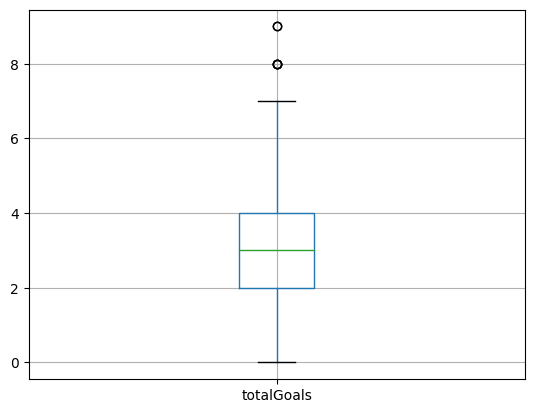

In [ ]:
dataMatches.boxplot(column=['totalGoals']) #Verificando simetria com boxplot

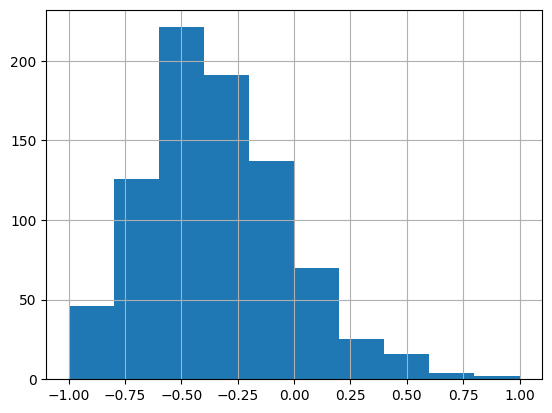

In [ ]:
#Normalizando a quantidade de gols por partida por min max entre -1 e 1
dataMatches['totalGoalsMinMax'] = ((dataMatches['totalGoals'] - dataMatches['totalGoals'].min()) / (dataMatches['totalGoals'].max() - dataMatches['totalGoals'].min())*2) -1
dataMatches['totalGoalsMinMax'].hist()

In [ ]:
#Dividindo os quartis de total de gols
q1 = dataMatches['totalGoalsMinMax'].quantile(q=0.25)
q3 = dataMatches['totalGoalsMinMax'].quantile(q=0.75)
intervaloInterQuartil = q3 - q1

In [ ]:
#Verificando os outliers
print(tabulate(dataMatches[(dataMatches['totalGoalsMinMax'] < (q1-1.5*intervaloInterQuartil))], headers='keys', tablefmt='psql')) # Outliers menores que q1 - 1.5 * intervaloInterQuartil
print(tabulate(dataMatches[(dataMatches['totalGoalsMinMax'] > (q3+1.5*intervaloInterQuartil))], headers='keys', tablefmt='psql')) # Outliers maiores que q3 + 1.5 * intervaloInterQuartil

+------+-----------+----------+------------+---------+---------+---------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+-----------------+---------------+-----------------+-------+--------------+-------------------+-------------------+--------------------+
| id   | utcDate   | status   | matchday   | stage   | group   | lastUpdated   | season.id   | season.startDate   | season.endDate   | season.currentMatchday   | score.winner   | score.duration   | score.fullTime.homeTeam   | score.fullTime.awayTeam   | score.halfTime.homeTeam   | score.halfTime.awayTeam   | homeTeam.id   | homeTeam.name   | awayTeam.id   | awayTeam.name   | ano   | totalGoals   | homeTeamOverall   | awayTeamOverall   | totalGoalsMinMax   |
|------+-----------+----------+------------+---------+---------+------------

* Após a verificação dos dados em sites especializados, verificou-se que todos os jogos dados como outliers estavam corretos, logo não foi excluído nenhum jogo
* Para fazer a detecção de outliers multivariados, usaremos a técnica Elliptic Envelope

In [ ]:
#Verificando os tipos dos dados
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam      int64
score.fullTime.awayTeam      int64
score.halfTime.homeTeam      int64
score.halfTime.awayTeam      int64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                          int64
totalGoals                   int64
homeTeamOverall              int64
awayTeamOverall              int64
totalGoalsMinMax           float64
dtype: object

In [ ]:
#Transformando dados que eram objetos em categóricos, criando códigos para as categorias e guardando em um dataFrame separado, caso exista algum erro, removeremos do dataframe original via ID da partida
dataMatches2 = dataMatches.copy()
dataMatches2['utcDate'] = dataMatches2['utcDate'].astype('category')
dataMatches2['status'] = dataMatches2['status'].astype('category')
dataMatches2['stage'] = dataMatches2['stage'].astype('category')
dataMatches2['lastUpdated'] = dataMatches2['lastUpdated'].astype('category')
dataMatches2['group'] = dataMatches2['group'].astype('category')
dataMatches2['season.startDate'] = dataMatches2['season.startDate'].astype('category')
dataMatches2['season.endDate'] = dataMatches2['season.endDate'].astype('category')
dataMatches2['score.winner'] = dataMatches2['score.winner'].astype('category')
dataMatches2['score.duration'] = dataMatches2['score.duration'].astype('category')
dataMatches2['homeTeam.name'] = dataMatches2['homeTeam.name'].astype('category')
dataMatches2['awayTeam.name'] = dataMatches2['awayTeam.name'].astype('category')
dataMatches2['utcDate'] = dataMatches2['utcDate'].cat.codes
dataMatches2['status'] = dataMatches2['status'].cat.codes
dataMatches2['stage'] = dataMatches2['stage'].cat.codes
dataMatches2['lastUpdated'] = dataMatches2['lastUpdated'].cat.codes
dataMatches2['group'] = dataMatches2['group'].cat.codes
dataMatches2['season.startDate'] = dataMatches2['season.startDate'].cat.codes
dataMatches2['season.endDate'] = dataMatches2['season.endDate'].cat.codes
dataMatches2['score.winner'] = dataMatches2['score.winner'].cat.codes
dataMatches2['score.duration'] = dataMatches2['score.duration'].cat.codes
dataMatches2['homeTeam.name'] = dataMatches2['homeTeam.name'].cat.codes
dataMatches2['awayTeam.name'] = dataMatches2['awayTeam.name'].cat.codes
print(tabulate(dataMatches2.head(), headers='keys', tablefmt='psql'))

+----+--------+-----------+----------+------------+---------+---------+---------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+-----------------+---------------+-----------------+-------+--------------+-------------------+-------------------+--------------------+
|    |     id |   utcDate |   status |   matchday |   stage |   group |   lastUpdated |   season.id |   season.startDate |   season.endDate |   season.currentMatchday |   score.winner |   score.duration |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id |   homeTeam.name |   awayTeam.id |   awayTeam.name |   ano |   totalGoals |   homeTeamOverall |   awayTeamOverall |   totalGoalsMinMax |
|----+--------+-----------+----------+------------+---------+-

In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01) #Considerando que 1% são outliers
detector.fit(dataMatches2)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning:

The covariance matrix associated to your dataset is not full rank



EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
                 store_precision=True, support_fraction=None)

In [ ]:
scores = detector.predict(dataMatches2) 
dataMatches['outlier'] = scores # Se for -1 é outlier, colocando os outliers direto no dataMatches, já que dataMatches e dataMatches2 tem o mesmo tamanho
print(tabulate(dataMatches[dataMatches['outlier'] == -1], headers='keys', tablefmt='psql'))

+-----+--------+----------------------+----------+------------+----------------+----------------+----------------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+----------------------+---------------+---------------------------+-------+--------------+-------------------+-------------------+--------------------+-----------+
|     |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          |   season.id | season.startDate   | season.endDate   |   season.currentMatchday | score.winner   | score.duration   |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id | homeTeam.name        |   awayTeam.id | awayTeam.name             |   ano |   totalGoals |   homeTeamOvera

* Após a verificação dos jogos em sites especializados, foi visto que todas as informações relativas aos jogos estavam corretas, logo nenhuma linha do dataFrame foi removida.

* Nas células abaixo, utilizaremos as informações do dataframe de partidas (dataMatches), para extrair algumas informações sobre os times e colocar no dataframe de times (dataTeams)

## Populando o dataframe de Times / Continuando o pré processamento

In [ ]:
#Pegando o total de jogos e colocando no dataframe de times
homeGames = dataMatches[dataMatches.status == 'FINISHED'].groupby(['homeTeam.id'])['id'].count()
awayGames = dataMatches[dataMatches.status == 'FINISHED'].groupby(['awayTeam.id'])['id'].count()
totalGames = homeGames.add(awayGames)
totalGames = totalGames.to_frame(name='totalGames')
dataTeams = pd.merge(dataTeams, totalGames, left_on='id', right_on='homeTeam.id', how='outer')

In [ ]:
#Pegando o total de vitórias de cada time e colocando no dataframe de times
winsHome = dataMatches[dataMatches['score.winner'] == 'HOME_TEAM'].groupby(['homeTeam.id'])['id'].count()
wins = winsHome.to_frame(name='homeWins')
wins['awayWins'] = dataMatches[dataMatches['score.winner'] == 'AWAY_TEAM'].groupby(['awayTeam.id'])['id'].count()
wins['totalWins'] = wins['awayWins'] + wins['homeWins']
dataTeams = pd.merge(dataTeams, wins, left_on='id', right_on='homeTeam.id', how='outer')

In [ ]:
#Pegando o total de derrotas, caso a quantidade seja NAN, substituir por 0
awayDefeats = dataMatches[dataMatches['score.winner'] == 'HOME_TEAM'].groupby(['awayTeam.id'])['id'].count()
defeats = awayDefeats.to_frame(name='awayDefeats')
defeats['homeDefeats'] = dataMatches[dataMatches['score.winner'] == 'AWAY_TEAM'].groupby(['homeTeam.id'])['id'].count()
defeats = defeats.fillna(0)#Tratando derrotas ausentes, colocando 0 pois se tratam de times recém-promovidos
defeats['totalDefeats'] = defeats['homeDefeats'] + defeats['awayDefeats']
dataTeams = pd.merge(dataTeams, defeats, left_on='id', right_on='awayTeam.id', how='outer')

In [ ]:
#Pegando o total de empates e colocando no dataframe de times
homeDraws = dataMatches[dataMatches['score.winner'] == 'DRAW'].groupby(['homeTeam.id'])['id'].count()
draws = homeDraws.to_frame(name='homeDraws')
draws['awayDraws'] = dataMatches[dataMatches['score.winner'] == 'DRAW'].groupby(['awayTeam.id'])['id'].count()
draws = draws.fillna(0)#Tratando empates ausentes, colocando 0 pois se tratam de times recém-promovidos (Tratamento de dados ausentes)
draws['totalDraws'] = draws['homeDraws'] + draws['awayDraws']
dataTeams = pd.merge(dataTeams, draws, left_on='id', right_on='homeTeam.id', how='outer')

In [ ]:
#Pegando o total de gols em casa, fora, no primeiro tempo e no segundo tempo e colocando no dataframe de times
homeGoals = dataMatches.groupby(['homeTeam.id'])['score.fullTime.homeTeam'].sum()
goals = homeGoals.to_frame(name='homeGoals')
goals['awayGoals'] = dataMatches.groupby(['awayTeam.id'])['score.fullTime.awayTeam'].sum()
goals['totalGoals'] = goals['homeGoals'] + goals['awayGoals']
goals['awayHalfTimeGoals'] = dataMatches.groupby(['awayTeam.id'])['score.halfTime.awayTeam'].sum()
goals['homeHalfTimeGoals'] = dataMatches.groupby(['homeTeam.id'])['score.halfTime.homeTeam'].sum()
dataTeams = pd.merge(dataTeams, goals, left_on='id', right_on='homeTeam.id', how='outer')

In [ ]:
#Pegando a quantidade de gols concedidos e colocando no dataframe de times
homeGoalsConceded = dataMatches.groupby(['homeTeam.id'])['score.fullTime.awayTeam'].sum()
goalsConceded = homeGoalsConceded.to_frame(name='homeGoalsConceded')
goalsConceded['awayGoalsConceded'] = dataMatches.groupby(['awayTeam.id'])['score.fullTime.homeTeam'].sum()
goalsConceded['totalGoalsConceded'] = goalsConceded['homeGoalsConceded'] + goalsConceded['awayGoalsConceded']
goalsConceded['awayHalfTimeGoalsConceded'] = dataMatches.groupby(['awayTeam.id'])['score.halfTime.homeTeam'].sum()
goalsConceded['homeHalfTimeGoalsConceded'] = dataMatches.groupby(['homeTeam.id'])['score.halfTime.awayTeam'].sum()
dataTeams = pd.merge(dataTeams, goalsConceded, left_on='id', right_on='homeTeam.id', how='outer')

In [ ]:
#Corrigindo os dados (Tratamento de dados ausentes / Limpando os dados)
dataTeams.loc[(dataTeams['id'] == 356),'founded'] = 1889 #Sheffield é do ano 1889
dataTeams = dataTeams.fillna(0) #Alguns times ainda nao venceram/empataram na PL pois são recém-promovidos
dataTeams = dataTeams.drop(columns=['crestUrl','address','phone','email','lastUpdated','area.id','area.name']) #Tirando dados que não iremos usar

In [ ]:
#Pegando os pontos por jogo de cada time
dataTeams = dataTeams.fillna(0) #Alguns times ainda nao venceram/empataram na PL pois são recém-promovidos (inputação)
dataTeams['pointsPerGame'] = ((dataTeams['totalWins']*3) + dataTeams['totalDraws'])/dataTeams['totalGames']
dataTeams.sort_values(by=['pointsPerGame', 'totalGoals'], inplace=True, ascending=False)

* Discretizando a quantidade de partidas, dividindo em 3 partes os times, de forma a saber quais times participaram de mais temporadas da Premier League entre os times que participaram nesses 3 anos

In [ ]:
dataTeams['seasonsAppearences'] = pd.cut(dataTeams['totalGames'],3)
print(tabulate(dataTeams, headers='keys', tablefmt='psql')) #IMPRIMINDO O DATAFRAME DE TIMES

+----+------+----------------------------+----------------+-------+------------------------------------+-----------+---------------------+----------------------------------------+-----------+--------------+------------+------------+-------------+---------------+---------------+----------------+-------------+-------------+--------------+-------------+-------------+--------------+---------------------+---------------------+---------------------+---------------------+----------------------+-----------------------------+-----------------------------+-----------------+----------------------+
|    |   id | name                       | shortName      | tla   | website                            |   founded | clubColors          | venue                                  |   overall |   totalGames |   homeWins |   awayWins |   totalWins |   awayDefeats |   homeDefeats |   totalDefeats |   homeDraws |   awayDraws |   totalDraws |   homeGoals |   awayGoals |   totalGoals |   awayHalfTimeGoals |   

## Análise descritiva dos dados
Na inglaterra existe uma elite do futebol que se chama Big 6, que são os 6 principais e mais tradicionais times da liga. Os times que pertecem ao Big 6 são Arsenal, Chelsea, Tottenham, Manchester United, Manchester City e Liverpool. Porém, nos últimos anos, observamos uma dominância grande de dois destes clubes, o Manchester City e o Liverpool. Nosso objetivo, então, é fazer uma análise dos dados das 3 temporadas mais recentes e destacar estes dois clubes perante a liga, e também fazer uma comparação entre eles.

In [ ]:
#Importando as bibliotecas matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns



*   No primeiro gráfico, pegamos as média dos overalls nos Fifas 19, 20 e 21 de cada time. Podemos observar que no game, Liverpool e Manchester City se destacam com as maiores médias de overalls, com 84.3 e 85, respectivamente



(72.0, 87.0)

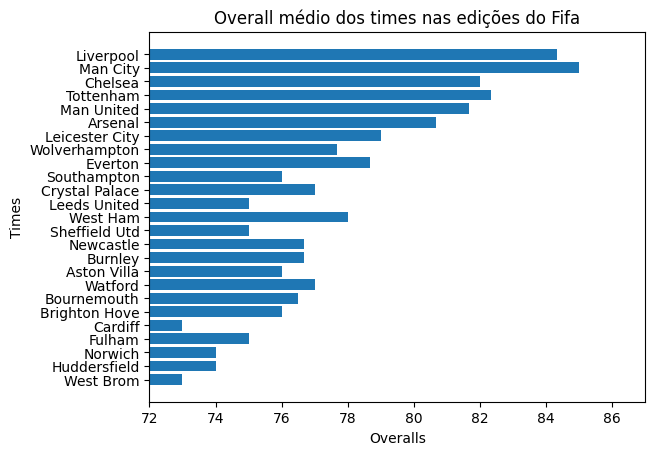

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(dataTeams['shortName'], dataTeams['overall'], align='center')
ax.set_yticks(dataTeams['shortName'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Overall médio dos times nas edições do Fifa')
plt.xlabel('Overalls')
plt.ylabel('Times')
plt.xlim(72,87)

#dfOverGraf = pd.DataFrame({'Times':dataTeams['shortName'], 'Overall':dataTeams['overall']})
#dfOverGraf.plot.bar(x='Overall', y='Times')

*   Aqui fizemos um gráfico de barras que representa a média de pontos por jogo de cada equipe, que varia de 0 a 3 pontos. Podemos observar o destaque entre Liverpool e Manchester City, com 2.56 e 2.31, respectivamente. A 3ª maior média é a do Chelsea, com 1.81 pontos por jogo.




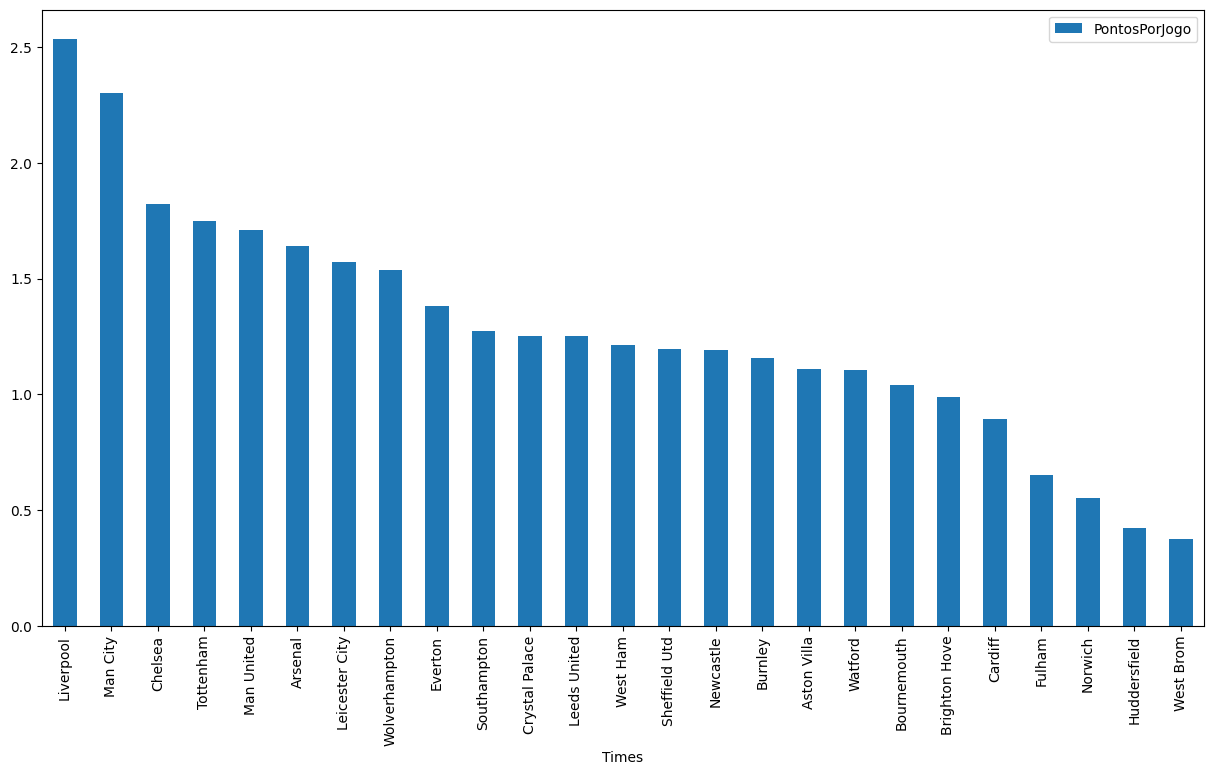

In [ ]:
dfVitoriasPorTime = pd.DataFrame({'Times':dataTeams['shortName'], 'PontosPorJogo':dataTeams['pointsPerGame']})
dfVitoriasPorTime.plot.bar(x='Times', y='PontosPorJogo', figsize=(15,8))



*   Agora temos o gráfico de barra do número de vitórias dos times. O Manchester City tem 59 vitórias, enquanto o do Liverpool já conta com 65. O terceiro time com mais vitórias, o  Chelsea, tem apenas 43.



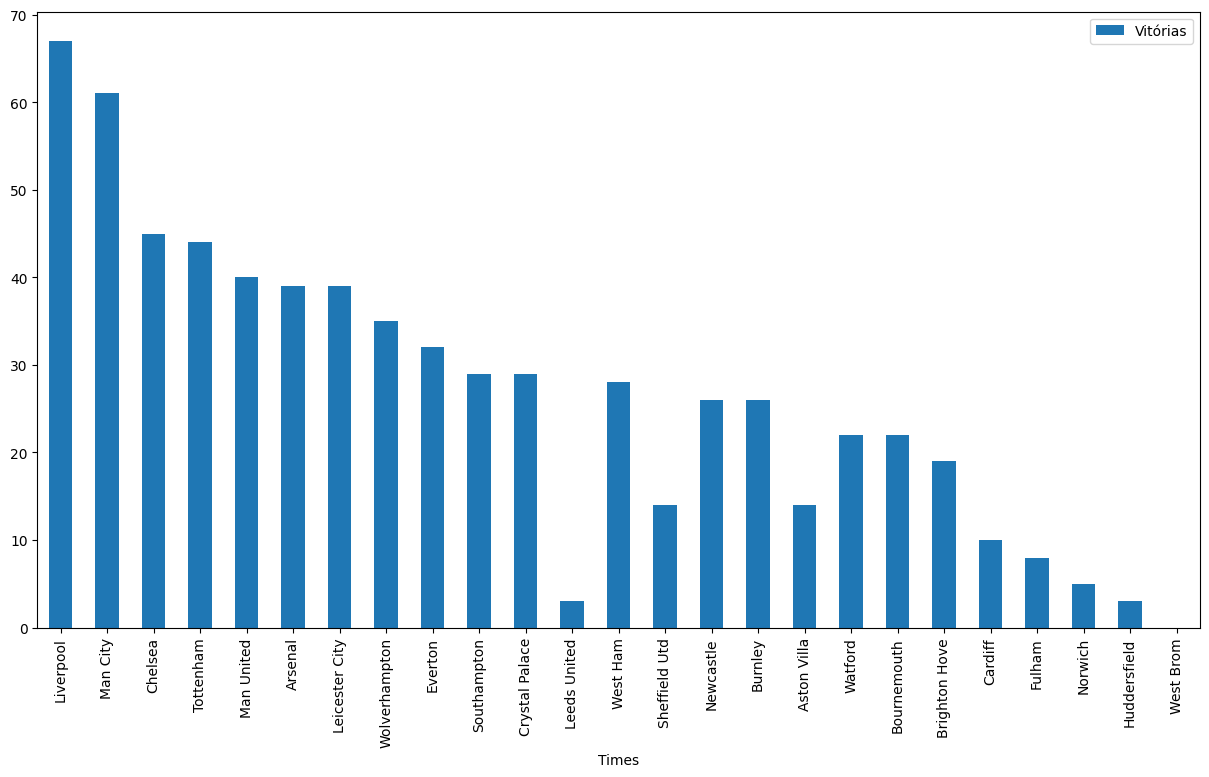

In [ ]:
#Grafico das vitórias por time
dfVitoriasPorTime = pd.DataFrame({'Times':dataTeams['shortName'], 'Vitórias':dataTeams['totalWins']})
dfVitoriasPorTime.plot.bar(x='Times', y='Vitórias', figsize=(15,8))



*   O número de vitórias destes dois times é impactante, e abaixo observamos que somados detém cerca de 20% do número de vitórias de toda a liga



Text(0.5, 1.0, 'Vitórias na Premier League desde 18/19')

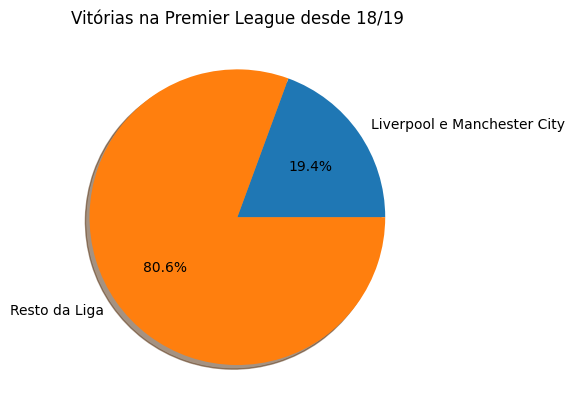

In [ ]:
#Grafico pizza de vitorias de Liverpool + City contra o resto da PL
dfLiv = dataTeams[dataTeams['shortName'] == 'Liverpool']
dfCity = dataTeams[dataTeams['shortName'] == 'Man City']
dfTop2 = pd.concat([dfLiv, dfCity])
dfRestOfPL = dataTeams.drop([4,5])

top2GoalsScored = dfTop2['totalWins'].sum()
restOfPLGoalsScored = dfRestOfPL['totalWins'].sum()
plt.pie([top2GoalsScored, restOfPLGoalsScored], labels=['Liverpool e Manchester City', 'Resto da Liga'], autopct='%1.1f%%', shadow=True)
plt.title('Vitórias na Premier League desde 18/19')



*   Manchester City e Liverpool possuem o primeiro e segundo melhor ataque, respectivamente, das ultimas três temporadas somadas. Eles estão separados por 18 gols. Os outros times da liga não passaram de 150 gols. 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



+----+-------------+--------------+
|    | shortName   |   totalGoals |
|----+-------------+--------------|
|  4 | Liverpool   |          192 |
|  5 | Man City    |          207 |
+----+-------------+--------------+


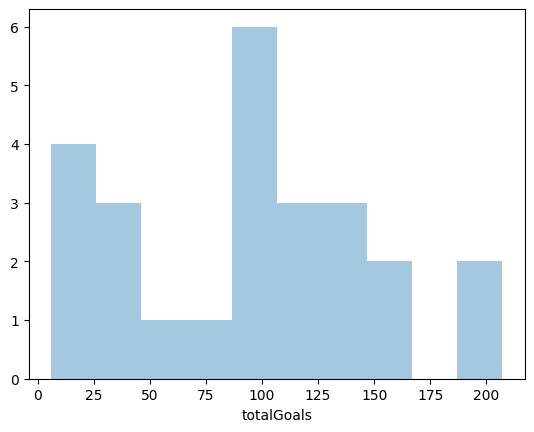

In [ ]:
#Distribuição de times por gols feitos num histograma (apenas dois times com mais de 175 gols)
sns.distplot(dataTeams['totalGoals'], bins=10, kde=False)
over175 = dataTeams.loc[dataTeams['totalGoals']>175, ['shortName','totalGoals']]
print(tabulate(over175, headers='keys', tablefmt='psql'))



*   Agora temos o histograma de gols concedidos na Premier League. Liverpool e Manchester City levaram 66 e 65 gols, respectivamente. Abaixo temos a tabela dos times que tomaram menos que 80 gols, dentre eles apenas os times em análise jogaram as tres temporadas da liga.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



+----+---------------+--------------+----------------------+
|    | shortName     |   totalGames |   totalGoalsConceded |
|----+---------------+--------------+----------------------|
|  4 | Liverpool     |           84 |                   71 |
|  5 | Man City      |           83 |                   67 |
| 22 | Sheffield Utd |           46 |                   53 |
| 20 | Aston Villa   |           45 |                   76 |
| 18 | Cardiff       |           38 |                   69 |
| 21 | Norwich       |           38 |                   75 |
| 15 | Huddersfield  |           38 |                   76 |
| 24 | Leeds United  |            8 |                   17 |
| 23 | West Brom     |            8 |                   17 |
+----+---------------+--------------+----------------------+


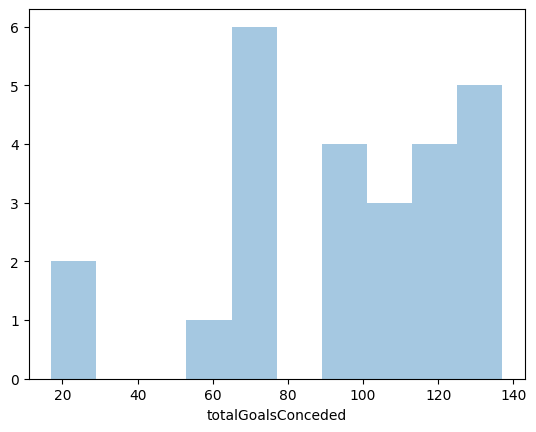

In [ ]:
sns.distplot(dataTeams['totalGoalsConceded'], bins=10, kde=False)
under80 = dataTeams.loc[dataTeams['totalGoalsConceded']<80, ['shortName','totalGames','totalGoalsConceded']].sort_values(by=['totalGames'], ascending=False)
print(tabulate(under80, headers='keys', tablefmt='psql'))


*   Nas temporadas em análise, houve 4 confrontos diretos entre City e Liverpool, com 2 vitórias para o Liverpool, 1 empate e 1 vitória para o City. Os outros dois confrontos desta temporada ainda vão acontecer



+-----+--------------------+---------------------------+---------------------------+--------------------+-------+
|     | homeTeam.name      |   score.fullTime.homeTeam |   score.fullTime.awayTeam | awayTeam.name      |   ano |
|-----+--------------------+---------------------------+---------------------------+--------------------+-------|
| 311 | Liverpool FC       |                         0 |                         0 | Manchester City FC |    19 |
| 243 | Manchester City FC |                         2 |                         1 | Liverpool FC       |    19 |
| 475 | Liverpool FC       |                         3 |                         1 | Manchester City FC |    20 |
| 756 | Manchester City FC |                         4 |                         0 | Liverpool FC       |    20 |
| 817 | Manchester City FC |                         1 |                         1 | Liverpool FC       |    21 |
+-----+--------------------+---------------------------+---------------------------+----

([<matplotlib.patches.Wedge at 0x7f7be289b048>,
 [Text(0.7778174593052024, 0.7778174593052023, 'Empate'),
  Text(-1.1, 1.3471114790620887e-16, 'Liverpool'),
  Text(0.7778174593052022, -0.7778174593052025, 'Manchester City')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

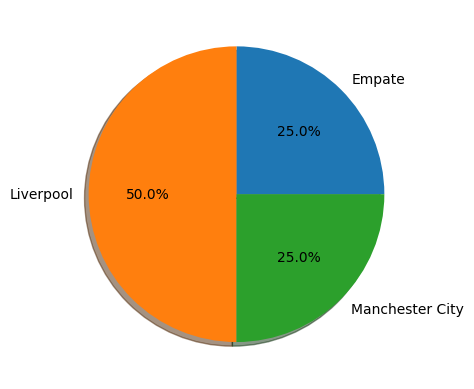

In [ ]:
#Liverpool x Manchester City
dfLivXCity = dataMatches.loc[(dataMatches['homeTeam.id']==64) & (dataMatches['awayTeam.id']==65) & (dataMatches['status']=='FINISHED'), ['homeTeam.name', 'score.fullTime.homeTeam', 'score.fullTime.awayTeam', 'awayTeam.name', 'ano']]
dfCityXLiv = dataMatches.loc[(dataMatches['homeTeam.id']==65) & (dataMatches['awayTeam.id']==64) & (dataMatches['status']=='FINISHED'), ['homeTeam.name', 'score.fullTime.homeTeam', 'score.fullTime.awayTeam', 'awayTeam.name', 'ano']]
dfClassico = pd.concat([dfLivXCity, dfCityXLiv]).sort_values(by=['ano'])
print(tabulate(dfClassico, headers='keys', tablefmt='psql'))
plt.pie([1,2,1], labels=['Empate', 'Liverpool', 'Manchester City'], autopct='%1.1f%%', shadow=True)



*   Neste gráfico de setores podemos observar o desempenho do Liverpool contra o restante do Big 6. 



+-----+--------+----------------------+----------+------------+----------------+----------------+----------------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+----------------------+---------------+----------------------+-------+--------------+-------------------+-------------------+--------------------+-----------+
|     |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          |   season.id | season.startDate   | season.endDate   |   season.currentMatchday | score.winner   | score.duration   |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id | homeTeam.name        |   awayTeam.id | awayTeam.name        |   ano |   totalGoals |   homeTeamOverall |   awa

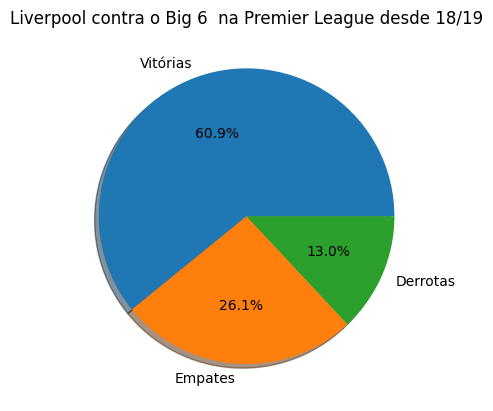

In [ ]:
#Desempenho do Liverpool contra o Big 6
#liv=64 city=65 che=61 tot=73 untd=66 ars=57
livGames = dataMatches.loc[((dataMatches['homeTeam.id']==64) | (dataMatches['awayTeam.id']==64)) & (dataMatches['status']=='FINISHED')]
livGamesAway = livGames.loc[(livGames['homeTeam.id']==65) | (livGames['homeTeam.id']==61) |  (livGames['homeTeam.id']==73) | (livGames['homeTeam.id']==66)| (livGames['homeTeam.id']==57)]
livGamesHome = livGames.loc[(livGames['awayTeam.id']==65) | (livGames['awayTeam.id']==61) |  (livGames['awayTeam.id']==73) | (livGames['awayTeam.id']==66)| (livGames['awayTeam.id']==57)]
livGamesB6 = pd.concat([livGamesAway,livGamesHome])
livWinsB6 = livGamesB6.loc[((livGamesB6['homeTeam.id']==64) & (livGamesB6['score.winner']=='HOME_TEAM')) | ((livGamesB6['awayTeam.id']==64) & (livGamesB6['score.winner']=='AWAY_TEAM'))].count()
livDrawsB6 = livGamesB6.loc[livGamesB6['score.winner']=='DRAW'].count()
livDefeatsB6 = livGamesB6.count()-livWinsB6-livDrawsB6
plt.pie([livWinsB6['id'], livDrawsB6['id'], livDefeatsB6['id']], labels=['Vitórias', 'Empates', 'Derrotas'], autopct='%1.1f%%', shadow=True)
plt.title('Liverpool contra o Big 6  na Premier League desde 18/19')
print(tabulate(livGamesB6 , headers='keys', tablefmt='psql'))

* Abaixo temos o gráfico de setores do Manchester City contra o Big 6. A percentagem de vitórias é parecida com a do Liverpool, porém há uma quantidade considerável de derrotas, 30%, enquanto a do liverpool é 13.6%.

Text(0.5, 1.0, 'Manchester City contra o Big 6 na Premier League desde 18/19')

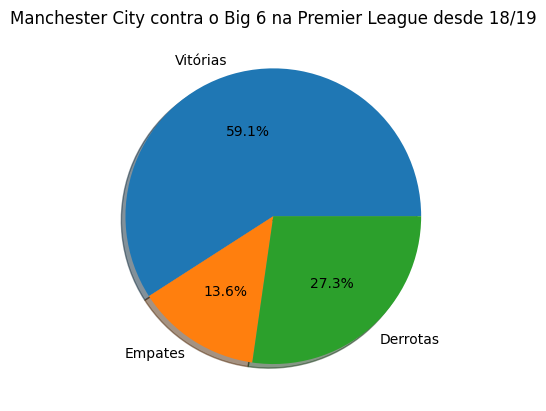

In [ ]:
#Desempenho do Manchester City contra o Big 6
cityGames = dataMatches.loc[((dataMatches['homeTeam.id']==65) | (dataMatches['awayTeam.id']==65)) & (dataMatches['status']=='FINISHED')]
cityGamesAway = cityGames.loc[(cityGames['homeTeam.id']==64) | (cityGames['homeTeam.id']==61) |  (cityGames['homeTeam.id']==73) | (cityGames['homeTeam.id']==66)| (cityGames['homeTeam.id']==57)]
cityGamesHome = cityGames.loc[(cityGames['awayTeam.id']==64) | (cityGames['awayTeam.id']==61) |  (cityGames['awayTeam.id']==73) | (cityGames['awayTeam.id']==66)| (cityGames['awayTeam.id']==57)]
cityGamesB6 = pd.concat([cityGamesAway,cityGamesHome])
cityWinsB6 = cityGamesB6.loc[((cityGamesB6['homeTeam.id']==65) & (cityGamesB6['score.winner']=='HOME_TEAM')) | ((cityGamesB6['awayTeam.id']==65) & (cityGamesB6['score.winner']=='AWAY_TEAM'))].count()
cityDrawsB6 = cityGamesB6.loc[cityGamesB6['score.winner']=='DRAW'].count()
cityDefeatsB6 = cityGamesB6.count()-cityWinsB6-cityDrawsB6
plt.pie([cityWinsB6['id'], cityDrawsB6['id'], cityDefeatsB6['id']], labels=['Vitórias', 'Empates', 'Derrotas'], autopct='%1.1f%%', shadow=True)
plt.title('Manchester City contra o Big 6 na Premier League desde 18/19')
#print(tabulate(livGamesB6 , headers='keys', tablefmt='psql'))



*   Abaixo adicionamos ao dataframe das partidas os gols que aconteceram no segundo tempo. Depois, criamos 4 dataframes para o Liverpool e City, com dados dentro e fora de casa separados. Ainda na célula, foram feitas as covariancias entre os atributos



In [ ]:

dataMatches['score.secondTime.homeTeam'] = dataMatches['score.fullTime.homeTeam']-dataMatches['score.halfTime.homeTeam']
dataMatches['score.secondTime.awayTeam'] = dataMatches['score.fullTime.awayTeam']-dataMatches['score.halfTime.awayTeam']
#Gerando a pontuação de cada time por jogo no dataframe de partidas
dataMatches.loc[dataMatches['score.winner'] == 'AWAY_TEAM','points.awayTeam.Gained'] = 3
dataMatches.loc[dataMatches['score.winner'] == 'DRAW','points.awayTeam.Gained'] = 1
dataMatches.loc[dataMatches['score.winner'] == 'HOME_TEAM','points.awayTeam.Gained'] = 0
dataMatches.loc[dataMatches['score.winner'] == 'AWAY_TEAM','points.homeTeam.Gained'] = 0
dataMatches.loc[dataMatches['score.winner'] == 'DRAW','points.homeTeam.Gained'] = 1
dataMatches.loc[dataMatches['score.winner'] == 'HOME_TEAM','points.homeTeam.Gained'] = 3
lvpHome = dataMatches.loc[dataMatches['homeTeam.id']==64]
lvpAway = dataMatches.loc[dataMatches['awayTeam.id']==64]
cityHome = dataMatches.loc[dataMatches['homeTeam.id']==65]
cityAway = dataMatches.loc[dataMatches['awayTeam.id']==65]

In [ ]:
lvpHome.cov()

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,4.934113e+08,-79306.140534,3.800169e+06,-140590.315912,-1450.957027,6253.193961,2601.855981,5296.314170,0.0,43323.134146,14526.583624,4802.236934,19357.283391,-6379.985482,1067.163763,0.0,-4052.813008,956.879791,-762.580139,1525.160279
matchday,-7.930614e+04,132.792102,-4.789222e+02,39.441347,1.427410,-0.465738,-1.556330,-0.957027,0.0,187.902439,-2.222997,0.961672,-1.725900,1.126597,0.213705,0.0,2.983740,0.491289,0.303136,-0.606272
season.id,3.800169e+06,-478.922184,3.173939e+04,-792.262485,-13.394890,45.481998,19.865273,33.253775,0.0,-953.865854,114.430314,32.087108,174.221835,-41.073751,7.130468,0.0,-33.260163,12.228223,-6.022648,12.045296
season.currentMatchday,-1.405903e+05,39.441347,-7.922625e+02,74.234611,0.168409,-2.088269,-0.774681,-2.391405,0.0,-160.560976,-3.839721,-1.919861,-2.559814,2.761905,-0.426636,0.0,0.943089,0.303136,0.202091,-0.404181
score.fullTime.homeTeam,-1.450957e+03,1.427410,-1.339489e+01,0.168409,1.718931,0.416957,0.922184,0.225319,0.0,16.658537,-0.045296,2.135889,-0.078978,-0.760743,0.474642,0.0,0.796748,0.191638,-0.156794,0.313589
score.fullTime.awayTeam,6.253194e+03,-0.465738,4.548200e+01,-2.088269,0.416957,0.771196,0.286876,0.391405,0.0,2.829268,0.181185,1.188153,0.218351,0.140534,0.264034,0.0,0.130081,0.379791,-0.006969,0.013937
score.halfTime.homeTeam,2.601856e+03,-1.556330,1.986527e+01,-0.774681,0.922184,0.286876,1.231127,0.217189,0.0,15.487805,0.076655,1.209059,0.099884,-0.573751,0.268680,0.0,-0.308943,0.069686,-0.059233,0.118467
score.halfTime.awayTeam,5.296314e+03,-0.957027,3.325377e+01,-2.391405,0.225319,0.391405,0.217189,0.344367,0.0,2.451220,0.148084,0.616725,0.131243,0.083043,0.137050,0.0,0.008130,0.047038,-0.005226,0.010453
homeTeam.id,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
awayTeam.id,4.332313e+04,187.902439,-9.538659e+02,-160.560976,16.658537,2.829268,15.487805,2.451220,0.0,63745.182927,-0.109756,19.487805,-11.292683,-341.036585,4.330623,0.0,1.170732,0.378049,-2.109756,4.219512


In [ ]:
lvpAway.cov()

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,4.936910e+08,-63904.576074,3.801485e+06,-140602.070848,10355.160279,-458.758420,7040.760743,1332.445993,-1.260030e+06,0.0,14530.947735,9896.401858,10565.134727,19365.200929,2199.200413,0.0,3314.399535,-1791.204413,-5198.017422,4811.327526
matchday,-6.390458e+04,130.826945,-3.406597e+02,37.353078,0.337979,-1.353078,1.291521,-0.526132,-3.029268e+01,0.0,-1.749129,-1.015099,-5.521487,-0.922184,-0.225577,0.0,-0.953542,-0.826945,-1.770035,2.027875
season.id,3.801485e+06,-340.659698,3.173939e+04,-792.262485,66.778746,-4.225319,46.377468,12.675958,-8.268634e+03,0.0,114.430314,62.553426,54.544135,174.221835,13.900761,0.0,20.401278,-16.901278,-29.116725,32.087108
season.currentMatchday,-1.406021e+05,37.353078,-7.922625e+02,74.234611,-4.445993,0.033682,-2.896632,-0.101045,5.248293e+02,0.0,-3.839721,-4.412311,-6.197445,-2.559814,-0.980514,0.0,-1.549361,0.134727,2.728223,-1.919861
score.fullTime.homeTeam,1.035516e+04,0.337979,6.677875e+01,-4.445993,1.726481,-0.188153,0.961672,0.027875,-1.004878e+02,0.0,0.290941,1.538328,0.681185,0.275261,0.341851,0.0,0.764808,-0.216028,-0.911150,0.944251
score.fullTime.awayTeam,-4.587584e+02,-1.353078,-4.225319e+00,0.033682,-0.188153,1.112660,-0.103368,0.393728,1.152927e+02,0.0,-0.013937,0.924506,-1.241580,-0.025552,0.205446,0.0,-0.084785,0.718931,0.783972,-0.567944
score.halfTime.homeTeam,7.040761e+03,1.291521,4.637747e+01,-2.896632,0.961672,-0.103368,0.743322,0.017422,-6.312195e+01,0.0,0.198606,0.858304,0.605110,0.197445,0.190734,0.0,0.218351,-0.120790,-0.592334,0.574913
score.halfTime.awayTeam,1.332446e+03,-0.526132,1.267596e+01,-0.101045,0.027875,0.393728,0.017422,0.501742,4.063415e+01,0.0,0.041812,0.421603,-0.397213,0.076655,0.093690,0.0,0.010453,-0.108014,0.282230,-0.198606
homeTeam.id,-1.260030e+06,-30.292683,-8.268634e+03,524.829268,-100.487805,115.292683,-63.121951,40.634146,6.394771e+04,0.0,-35.560976,14.804878,-362.048780,-34.926829,3.289973,0.0,-37.365854,74.658537,103.658537,-75.390244
awayTeam.id,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
cityHome.cov()

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,4.428863e+08,-44239.066463,3.540498e+06,-110741.504268,-6386.879268,5490.741463,-2109.705488,1119.253659,0.0,-700263.564024,13168.446341,-896.137805,0.0,13555.465244,-199.141734,0.0,-4277.173780,4371.487805,5927.312805,-7779.460366
matchday,-4.423907e+04,125.839024,-2.204366e+02,28.080488,-0.594512,-3.889024,-0.528659,-2.247561,0.0,425.132317,-1.202439,-4.483537,0.0,0.976829,-0.996341,0.0,-0.065854,-1.641463,-2.641463,3.184756
season.id,3.540498e+06,-220.436585,3.052473e+04,-623.906707,-35.856707,32.836585,-13.587195,6.416463,0.0,-5175.400610,107.558537,-3.020122,0.0,74.356098,-0.671138,0.0,-22.269512,26.420122,42.270122,-56.234146
season.currentMatchday,-1.107415e+05,28.080488,-6.239067e+02,58.459756,3.359756,-2.705488,0.901829,-0.601220,0.0,228.746341,-3.023780,0.654268,0.0,-7.338415,0.145393,0.0,2.457927,-2.104268,-2.104268,2.670122
score.fullTime.homeTeam,-6.386879e+03,-0.594512,-3.585671e+01,3.359756,2.909756,-0.505488,1.651829,-0.151220,0.0,2.771341,-0.173780,2.404268,0.0,-1.188415,0.534282,0.0,1.257927,-0.354268,-0.579268,0.670122
score.fullTime.awayTeam,5.490741e+03,-3.889024,3.283659e+01,-2.705488,-0.505488,1.039024,-0.271341,0.397561,0.0,5.892683,0.152439,0.533537,0.0,0.523171,0.118564,0.0,-0.234146,0.641463,0.741463,-0.809756
score.halfTime.homeTeam,-2.109705e+03,-0.528659,-1.358720e+01,0.901829,1.651829,-0.271341,1.498780,-0.040854,0.0,4.252439,-0.059146,1.380488,0.0,0.050610,0.306775,0.0,0.153049,-0.230488,-0.305488,0.336585
score.halfTime.awayTeam,1.119254e+03,-2.247561,6.416463e+00,-0.601220,-0.151220,0.397561,-0.040854,0.343902,0.0,4.481707,0.031098,0.246341,0.0,0.207927,0.054743,0.0,-0.110366,0.053659,0.303659,-0.349390
homeTeam.id,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
awayTeam.id,-7.002636e+05,425.132317,-5.175401e+03,228.746341,2.771341,5.892683,4.252439,4.481707,0.0,63941.845122,-20.456707,8.664024,0.0,-357.001220,1.925339,0.0,-1.481098,1.410976,-21.989024,29.076829


In [ ]:
cityAway.cov()

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,4.934168e+08,-79152.044715,3.800104e+06,-140600.959350,3616.780488,-657.223577,1709.914634,-523.544715,63958.910569,0.0,14526.573171,2959.556911,-7819.971545,0.0,657.679313,0.0,1906.865854,-133.678862,-4068.626016,2417.532520
matchday,-7.915204e+04,133.682346,-4.867485e+02,38.363531,-0.808362,-0.476771,-0.601045,-1.200929,-125.725900,0.0,-2.228223,-1.285134,-1.425668,0.0,-0.285585,0.0,-0.207317,0.724158,0.570267,0.808943
season.id,3.800104e+06,-486.748548,3.173939e+04,-792.262485,39.289199,8.368757,19.959930,-2.875726,-822.660859,0.0,114.430314,47.657956,-45.563879,0.0,10.590657,0.0,19.329268,11.244483,-40.096400,32.459350
season.currentMatchday,-1.406010e+05,38.363531,-7.922625e+02,74.234611,0.303136,1.751452,0.303136,0.269454,-172.854820,0.0,-3.839721,2.054588,3.907085,0.0,0.456575,0.0,0.000000,1.481998,0.134727,0.943089
score.fullTime.homeTeam,3.616780e+03,-0.808362,3.928920e+01,0.303136,0.905923,-0.421603,0.369338,-0.229965,-83.160279,0.0,0.118467,0.484321,0.470383,0.0,0.107627,0.0,0.536585,-0.191638,-1.017422,1.000000
score.fullTime.awayTeam,-6.572236e+02,-0.476771,8.368757e+00,1.751452,-0.421603,2.400116,-0.189895,1.281069,104.255517,0.0,-0.005226,1.978513,-1.887921,0.0,0.439670,0.0,-0.231707,1.119048,1.238095,-1.101626
score.halfTime.homeTeam,1.709915e+03,-0.601045,1.995993e+01,0.303136,0.369338,-0.189895,0.332753,-0.108014,-11.965157,0.0,0.057491,0.179443,0.238676,0.0,0.039876,0.0,0.036585,-0.081882,-0.407666,0.402439
score.halfTime.awayTeam,-5.235447e+02,-1.200929,-2.875726e+00,0.269454,-0.229965,1.281069,-0.108014,1.112660,39.253194,0.0,-0.013937,1.051103,-1.232288,0.0,0.233579,0.0,-0.121951,0.168409,0.678281,-0.593496
homeTeam.id,6.395891e+04,-125.725900,-8.226609e+02,-172.854820,-83.160279,104.255517,-11.965157,39.253194,63574.380952,0.0,0.526132,21.095238,-320.645761,0.0,4.687831,0.0,-71.195122,65.002323,123.224158,-117.040650
awayTeam.id,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000




*   Nas 4 proximas células foram feitas scarplotts com densidades (os mais escuros são os que ocorrem numa maior frequência), sendo o eixo X gols no primeiro tempo e o Eixo Y gols no segundo tempo. Os dois primeiros são do Liverpool, em vermelho. Já os dois últimos são do City, em azul. 
* Podemos observar que a distribuição de bolinhas nos gráficos do Manchester City são mais amplas, o que indica que teve jogos em que marcou uma quantidade de gols enorme, ao contrário do Liverpool, que principalmente fora de casa não tem costume de marcar tantos gols.



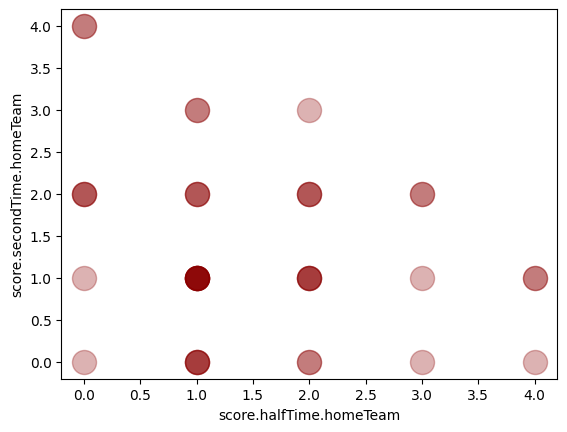

In [ ]:
sns.regplot(x=lvpHome['score.halfTime.homeTeam'], y=lvpHome['score.secondTime.homeTeam'], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":300})

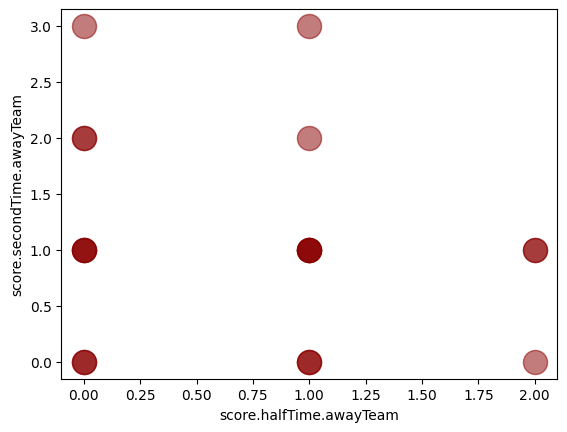

In [ ]:
sns.regplot(x=lvpAway['score.halfTime.awayTeam'], y=lvpAway['score.secondTime.awayTeam'], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":300})

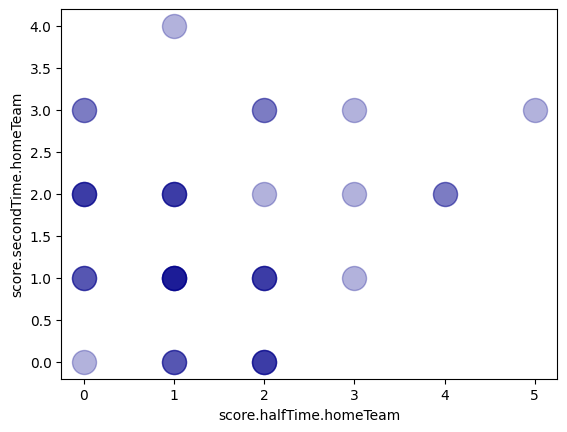

In [ ]:
sns.regplot(x=cityHome['score.halfTime.homeTeam'], y=cityHome['score.secondTime.homeTeam'], fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":300})

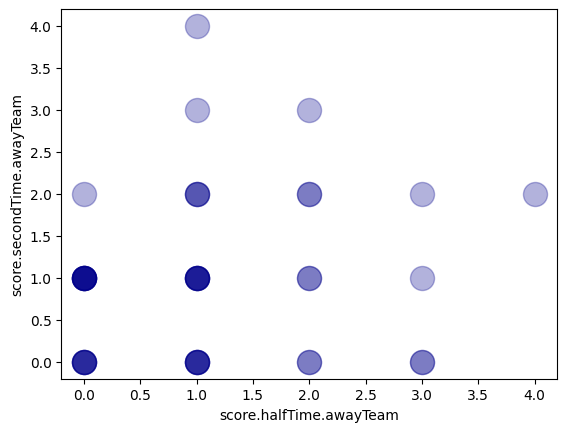

In [ ]:
sns.regplot(x=cityAway['score.halfTime.awayTeam'], y=cityAway['score.secondTime.awayTeam'], fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":300})



*   Com a covariância feita, faremos agora a correlação entre os atributos. Vamos destacar a correlação entre "totalGoals", "score.fullTime.homeTeam" e "score.fullTime.awayTeam". O método usado foi o de Pearson, pois são duas variáveis dependentes e quantitativas.
* Podemos observar, nos jogos do Manchester city, que a correlação entre os gols feitos pelo city e o total de gols na partida é forte. Já correlação entre os gols dos adversários e o total de gols na partida é fraca. Podemos inferir, então, que os placares nos jogos do city tendem a ser elásticos, com grande influencia de seus gols no placar do jogo e baixa influencia dos gols do adversário
* Já nos jogos do Liverpool, apesar do ótimo desempenho do time, observamos que a correlação entre os gols do adversário no placar também é alta, influenciando assim no placar da partida.Isso indica, então, que os placares são menos elásticos. Apesar do ótimo restrospecto, o Liverpool não aplica tantas goleadas em seus jogos.



In [ ]:
cityHome.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.187392,0.962925,-0.688233,-0.177916,0.255960,-0.081885,0.090691,NaN,-0.131590,0.996998,-0.024844,NaN,0.213382,-0.024844,NaN,-0.193354,0.270936,0.307709,-0.369211
matchday,-0.187392,1.000000,-0.112473,0.327392,-0.031069,-0.340111,-0.038494,-0.341654,NaN,0.149873,-0.170789,-0.233186,NaN,0.028847,-0.233186,NaN,-0.005585,-0.190856,-0.257256,0.283556
season.id,0.962925,-0.112473,1.000000,-0.467052,-0.120314,0.184382,-0.063524,0.062626,NaN,-0.117145,0.980900,-0.010085,NaN,0.140987,-0.010085,NaN,-0.121263,0.197239,0.264324,-0.321474
season.currentMatchday,-0.688233,0.327392,-0.467052,1.000000,0.257603,-0.347140,0.096344,-0.134087,NaN,0.118313,-0.630126,0.049925,NaN,-0.317952,0.049925,NaN,0.305832,-0.358968,-0.300678,0.348798
score.fullTime.homeTeam,-0.177916,-0.031069,-0.120314,0.257603,1.000000,-0.290716,0.790984,-0.151169,NaN,0.006425,-0.162322,0.822324,NaN,-0.230796,0.822324,NaN,0.701568,-0.270887,-0.371005,0.392371
score.fullTime.awayTeam,0.255960,-0.340111,0.184382,-0.347140,-0.290716,1.000000,-0.217437,0.665079,NaN,0.022862,0.238281,0.305379,NaN,0.170027,0.305379,NaN,-0.218533,0.820810,0.794704,-0.793437
score.halfTime.homeTeam,-0.081885,-0.038494,-0.063524,0.096344,0.790984,-0.217437,1.000000,-0.056904,NaN,0.013737,-0.076978,0.657888,NaN,0.013695,0.657888,NaN,0.118933,-0.245563,-0.272617,0.274598
score.halfTime.awayTeam,0.090691,-0.341654,0.062626,-0.134087,-0.151169,0.665079,-0.056904,1.000000,NaN,0.030223,0.084492,0.245080,NaN,0.117458,0.245080,NaN,-0.179044,0.119345,0.565713,-0.595065
homeTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awayTeam.id,-0.131590,0.149873,-0.117145,0.118313,0.006425,0.022862,0.013737,0.030223,NaN,1.000000,-0.128899,0.019990,NaN,-0.467698,0.019990,NaN,-0.005572,0.007278,-0.095004,0.114849


In [ ]:
cityAway.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.308190,0.960261,-0.734646,0.171068,-0.019098,0.133446,-0.022344,0.011420,NaN,0.996928,0.084899,-0.124390,NaN,0.084899,NaN,0.121403,-0.006172,-0.138310,0.085888
matchday,-0.308190,1.000000,-0.236303,0.385104,-0.073455,-0.026617,-0.090118,-0.098469,-0.043127,NaN,-0.293785,-0.070826,-0.043568,NaN,-0.070826,NaN,-0.025358,0.064237,0.037244,0.055214
season.id,0.960261,-0.236303,1.000000,-0.516139,0.231701,0.030321,0.194222,-0.015303,-0.018314,NaN,0.979150,0.170458,-0.090367,NaN,0.170458,NaN,0.153437,0.064734,-0.169949,0.143784
season.currentMatchday,-0.734646,0.385104,-0.516139,1.000000,0.036965,0.131214,0.060992,0.029648,-0.079568,NaN,-0.679366,0.151951,0.160227,NaN,0.151951,NaN,0.000000,0.176415,0.011808,0.086381
score.fullTime.homeTeam,0.171068,-0.073455,0.231701,0.036965,1.000000,-0.285918,0.672694,-0.229053,-0.346521,NaN,0.189740,0.324242,0.174620,NaN,0.324242,NaN,0.797275,-0.206503,-0.807176,0.829131
score.fullTime.awayTeam,-0.019098,-0.026617,0.030321,0.131214,-0.285918,1.000000,-0.212490,0.783926,0.266896,NaN,-0.005143,0.813777,-0.430581,NaN,0.813777,NaN,-0.211514,0.740840,0.603464,-0.561160
score.halfTime.homeTeam,0.133446,-0.090118,0.194222,0.060992,0.672694,-0.212490,1.000000,-0.177516,-0.082265,NaN,0.151932,0.198220,0.146196,NaN,0.198220,NaN,0.089694,-0.145585,-0.533650,0.550565
score.halfTime.awayTeam,-0.022344,-0.098469,-0.015303,0.029648,-0.229053,0.783926,-0.177516,1.000000,0.147589,NaN,-0.020142,0.634960,-0.412780,NaN,0.634960,NaN,-0.163501,0.163748,0.485559,-0.444023
homeTeam.id,0.011420,-0.043127,-0.018314,-0.079568,-0.346521,0.266896,-0.082265,0.147589,1.000000,NaN,0.003181,0.053312,-0.449336,NaN,0.053312,NaN,-0.399323,0.264411,0.369035,-0.366323
awayTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lvpHome.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.309825,0.960283,-0.734594,-0.049822,0.320564,0.105567,0.406311,NaN,0.007725,0.996934,0.118578,0.864939,-0.097339,0.118578,NaN,-0.173514,0.074678,-0.131706,0.131706
matchday,-0.309825,1.000000,-0.233281,0.397249,0.094479,-0.046023,-0.121721,-0.141523,NaN,0.064584,-0.294076,0.045773,-0.148654,0.033133,0.045773,NaN,0.246240,0.073908,0.100919,-0.100919
season.id,0.960283,-0.233281,1.000000,-0.516139,-0.057347,0.290709,0.100495,0.318076,NaN,-0.021206,0.979150,0.098787,0.970620,-0.078134,0.098787,NaN,-0.177545,0.118988,-0.129692,0.129692
season.currentMatchday,-0.734594,0.397249,-0.516139,1.000000,0.014908,-0.275995,-0.081034,-0.472976,NaN,-0.073810,-0.679366,-0.122217,-0.294884,0.108637,-0.122217,NaN,0.104096,0.060992,0.089984,-0.089984
score.fullTime.homeTeam,-0.049822,0.094479,-0.057347,0.014908,1.000000,0.362143,0.633923,0.292859,NaN,0.050325,-0.052667,0.893544,-0.059789,-0.196644,0.893544,NaN,0.577929,0.253391,-0.458802,0.458802
score.fullTime.awayTeam,0.320564,-0.046023,0.290709,-0.275995,0.362143,1.000000,0.294415,0.759510,NaN,0.012761,0.314519,0.742090,0.246785,0.054234,0.742090,NaN,0.140869,0.749724,-0.030443,0.030443
score.halfTime.homeTeam,0.105567,-0.121721,0.100495,-0.081034,0.633923,0.294415,1.000000,0.333562,NaN,0.055286,0.105317,0.597672,0.089349,-0.175245,0.597672,NaN,-0.264795,0.108877,-0.204804,0.204804
score.halfTime.awayTeam,0.406311,-0.141523,0.318076,-0.472976,0.292859,0.759510,0.333562,1.000000,NaN,0.016544,0.384684,0.576431,0.221978,0.047958,0.576431,NaN,0.013176,0.138957,-0.034168,0.034168
homeTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awayTeam.id,0.007725,0.064584,-0.021206,-0.073810,0.050325,0.012761,0.055286,0.016544,NaN,1.000000,-0.000663,0.042336,-0.044393,-0.457772,0.042336,NaN,0.004410,0.002596,-0.032058,0.032058


In [ ]:
lvpAway.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.251452,0.960343,-0.734448,0.354690,-0.019574,0.367539,0.084661,-0.224254,NaN,0.996951,0.283813,0.152048,0.865048,0.283813,NaN,0.201790,-0.088650,-0.201855,0.218451
matchday,-0.251452,1.000000,-0.167176,0.379031,0.022488,-0.112148,0.130968,-0.064939,-0.010473,NaN,-0.233121,-0.056551,-0.154362,-0.080023,-0.056551,NaN,-0.112775,-0.079504,-0.133525,0.178858
season.id,0.960343,-0.167176,1.000000,-0.516139,0.285271,-0.022484,0.301939,0.100448,-0.183536,NaN,0.979150,0.223735,0.097900,0.970620,0.223735,NaN,0.154910,-0.104323,-0.141017,0.181697
season.currentMatchday,-0.734448,0.379031,-0.516139,1.000000,-0.392722,0.003706,-0.389943,-0.016557,0.240881,NaN,-0.679366,-0.326321,-0.230008,-0.294884,-0.326321,NaN,-0.243260,0.017195,0.273216,-0.224793
score.fullTime.homeTeam,0.354690,0.022488,0.285271,-0.392722,1.000000,-0.135753,0.848903,0.029949,-0.302427,NaN,0.337545,0.746020,0.165774,0.207927,0.746020,NaN,0.787397,-0.180797,-0.598326,0.724975
score.fullTime.awayTeam,-0.019574,-0.112148,-0.022484,0.003706,-0.135753,1.000000,-0.113663,0.526957,0.432223,NaN,-0.020142,0.558485,-0.376380,-0.024043,0.558485,NaN,-0.108733,0.749494,0.641281,-0.543176
score.halfTime.homeTeam,0.367539,0.130968,0.301939,-0.389943,0.848903,-0.113663,1.000000,0.028527,-0.289521,NaN,0.351166,0.634359,0.224429,0.227302,0.634359,NaN,0.342601,-0.154065,-0.592799,0.672713
score.halfTime.awayTeam,0.084661,-0.064939,0.100448,-0.016557,0.029949,0.526957,0.028527,1.000000,0.226850,NaN,0.089984,0.379267,-0.179314,0.107410,0.379267,NaN,0.019963,-0.167688,0.343789,-0.282858
homeTeam.id,-0.224254,-0.010473,-0.183536,0.240881,-0.302427,0.432223,-0.289521,0.226850,1.000000,NaN,-0.214372,0.037306,-0.457812,-0.137086,0.037306,NaN,-0.199887,0.324660,0.353689,-0.300759
awayTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Teste de Hipótese

  Iremos testar algumas das afirmações que fizemos com relação ao desempenho do Manchester City e o do Liverpool na parte de análise descritiva

* Testaremos primeiro se o Manchester City e o Liverpool tem o mesmo desempenho dentro e fora de casa
* Depois, testaremos a hipótese que quantidade de Gols dentro de casa dos dois times é maior do que a quantidade de gols fora de casa
* Além disso, testaremos a hipótese de que a defesa do Manchester City é mais imprevisível que a do Liverpool, ou seja, toma uma quantidade de gols mais constante, visto que um dos zagueiros do Liverpool já foi eleito o melhor jogador do mundo e a defesa do Manchester City é vista como o ponto fraco do time.


In [ ]:
from scipy import stats

In [ ]:
#vericando se a pontuação do Manchester City dentro e fora de casa seguem uma gaussiana
homePoints = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 65)][['points.homeTeam.Gained']])
awayPoints = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 65)][['points.awayTeam.Gained']])
print(homePoints, awayPoints)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.47446727752685547, 6.224144116773189e-11) (0.6516546010971069, 9.858363014814131e-09)


In [ ]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityDentroDeCasa == MancityForaDeCasa, H1 : MancityDentroDeCasa != MancityForaDeCasa, teste bilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 65)][['points.homeTeam.Gained']], dataMatches[(dataMatches['awayTeam.id'] == 65)][['points.awayTeam.Gained']])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning:

Calling `mannwhitneyu` without specifying `alternative` is deprecated.



MannwhitneyuResult(statistic=695.5, pvalue=0.025925988331216832)

In [ ]:
#Vericando se a pontuação do Liverpool dentro e fora de casa seguem uma gaussiana
homePoints = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 64)][['points.homeTeam.Gained']])
awayPoints = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 64)][['points.awayTeam.Gained']])
print(homePoints, awayPoints)

(0.2839019298553467, 4.82422424490786e-13) (0.6553049683570862, 1.1208312500343709e-08)


In [ ]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : LiverpoolDentroDeCasa == LiverpoolForaDeCasa, H1 : LiverpoolDentroDeCasa != LiverpoolForaDeCasa, teste bilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 64)][['points.homeTeam.Gained']], dataMatches[(dataMatches['awayTeam.id'] == 64)][['points.awayTeam.Gained']])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning:

Calling `mannwhitneyu` without specifying `alternative` is deprecated.



MannwhitneyuResult(statistic=643.5, pvalue=0.0011703398725163789)

Baseado nos testes, verificamos que:

*   A hipótese nula foi rejeitada nos dois casos, logo o desempenho do Manchester City e do Liverpool dentro e fora de casa são diferentes, visto que os P-values são abaixo de 0.025






Testando a hipótese que quantidade de Gols dentro de casa dos dois times é maior do que a quantidade de gols fora de casa:

In [ ]:
#Vericando se a quantidade de gols do Manchester City dentro e fora de casa seguem uma gaussiana
homeGoals = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 65)][['score.fullTime.homeTeam']])
awayGoals = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 65)][['score.fullTime.awayTeam']])
print(homeGoals, awayGoals)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.8926713466644287, 0.0010148404398933053) (0.9158389568328857, 0.004443020094186068)


In [ ]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGolsDentroDeCasa <= MancityGolsForaDeCasa, H1 : MancityGolsDentroDeCasa > MancityGolsForaDeCasa, teste unilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 65)][['score.fullTime.homeTeam']], dataMatches[(dataMatches['awayTeam.id'] == 65)][['score.fullTime.awayTeam']])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning:

Calling `mannwhitneyu` without specifying `alternative` is deprecated.



MannwhitneyuResult(statistic=634.0, pvalue=0.01746918717456033)

In [ ]:
#Vericando se a quantidade de gols do Liverpool dentro e fora de casa seguem uma gaussiana
homeGoals = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 64)][['score.fullTime.homeTeam']])
awayGoals = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 64)][['score.fullTime.awayTeam']])
print(homeGoals, awayGoals)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.9238541722297668, 0.008082414977252483) (0.9155986309051514, 0.004365323111414909)


In [ ]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGolsDentroDeCasa <= MancityGolsForaDeCasa, H1 : MancityGolsDentroDeCasa > MancityGolsForaDeCasa, teste unilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 64)][['score.fullTime.homeTeam']], dataMatches[(dataMatches['awayTeam.id'] == 64)][['score.fullTime.awayTeam']])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning:

Calling `mannwhitneyu` without specifying `alternative` is deprecated.



MannwhitneyuResult(statistic=496.5, pvalue=0.0001921509025898905)

Baseado nos testes, verificamos que:

* A hipótese nula foi rejeitada nos dois casos, logo a quantidade de gols do Manchester City e do Liverpool dentro e fora de casa são diferentes, visto que os P-values são abaixo de 0.05

Testando a hipótese que a defesa do Manchester City é mais imprevisível, ou seja, a quantidade de gols que toma por jogo varia mais do que a do Liverpool ou não




In [ ]:
#Criando a distribuição de gols do ManCity
manCityHomeGoalsConceded = cityHome['score.fullTime.awayTeam']
manCityAwayGoalsConceded = cityAway['score.fullTime.homeTeam']
manCityGoalsConceded = pd.concat([manCityHomeGoalsConceded,manCityAwayGoalsConceded])
manCityGoalsConceded = manCityGoalsConceded.to_frame(name='totalGoalsConceded')

In [ ]:
#Criando a distribuição de gols do Liverpool
lvpHomeGoalsConceded = lvpHome['score.fullTime.awayTeam']
lvpAwayGoalsConceded = lvpAway['score.fullTime.homeTeam']
lvpGoalsConceded = pd.concat([lvpHomeGoalsConceded,lvpAwayGoalsConceded])
lvpGoalsConceded = lvpGoalsConceded.to_frame(name='totalGoalsConceded')

In [ ]:
#Vericando se a frequencia de gols concedidos do Manchester City e do Liverpool seguem uma gaussiana
lvpGoalsConcededTest = stats.shapiro(lvpGoalsConceded['totalGoalsConceded'])
manCityGoalsConcededTest = stats.shapiro(manCityGoalsConceded['totalGoalsConceded'])
print(lvpGoalsConcededTest,manCityGoalsConcededTest)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.692052960395813, 5.5464933861049115e-12) (0.7696860432624817, 4.461563063440366e-10)


In [ ]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGols == LiverpoolGolsConcedidos, H1 : MancityGols != LiverpoolGolsConcedidos, teste bilateral)
stats.mannwhitneyu(manCityGoalsConceded, lvpGoalsConceded)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning:

Calling `mannwhitneyu` without specifying `alternative` is deprecated.



MannwhitneyuResult(statistic=3456.0, pvalue=0.45929040128216786)

Baseado nos testes, verificamos que:

* A hipótese nula não foi rejeitada, visto que o P-Value é 0.42, logo a defesa do Manchester City, mesmo muito criticada, não é mais imprevisível do que a do Liverpool

# Projeto 2


## Separação do dataframe, seleção de coluna, separação em treinamento, validação e teste e seleção dos algoritmos (Passos 1, 2 e 3)

* Para o projeto 2, usaremos um dataframe que é uma união entre alguns elementos do dataMatches (Dados de cada partida) e do dataTeams (Estatísticas de cada time, como quantidade de vitórias, derrotas e etc)
* Faremos a predição do vencedor (o time da casa ou de fora) ou se ocorreu empate em uma partida, baseada no overall dos jogadores no jogo FIFA (Coletada por um crawler no projeto 1) além da quantidade de vitórias, derrotas e empates dos dois times nos últimos 3 anos

In [ ]:
dataMatchPrediction = dataMatches[['score.winner', 'ano' ,'homeTeam.id', 'homeTeam.name', 'awayTeam.id', 'awayTeam.name', 'homeTeamOverall', 'awayTeamOverall']] # Usando todos esses atributos do dataMatches para criar o dataframe de predição
dataTeamPrediction = dataTeams[['id','homeWins', 'homeDefeats', 'homeDraws']] # Usando todos esses atributos do dataTeams para criar o dataframe de predição, porém esses dados são somente do time da casa
dataMatchPrediction = dataMatchPrediction.merge(dataTeamPrediction, how='outer', left_on='homeTeam.id', right_on='id') # Unindo todos esses atributos citados anteriormente

dataTeamPrediction = dataTeams[['id','awayWins', 'awayDefeats', 'awayDraws']] # Colocando agora os atributos do time de fora, para unir com o dataframe de predição
dataMatchPrediction = dataMatchPrediction.merge(dataTeamPrediction, how='outer', left_on='awayTeam.id', right_on='id', suffixes=('_Team1', '_Team2')) # Fazendo a união do dataframe de predição com os dados colhidos anteriormente
#OBS: TEAM 1 = TIME DA CASA             TEAM 2 = TIME DE FORA
print(tabulate( dataMatchPrediction.head(), headers='keys', tablefmt='psql')) # Imprimindo os 5 primeiros elementos do dataframe resultante


+----+----------------+-------+---------------+----------------------+---------------+-------------------+-------------------+-------------------+------------+------------+---------------+-------------+------------+------------+---------------+-------------+
|    | score.winner   |   ano |   homeTeam.id | homeTeam.name        |   awayTeam.id | awayTeam.name     |   homeTeamOverall |   awayTeamOverall |   id_Team1 |   homeWins |   homeDefeats |   homeDraws |   id_Team2 |   awayWins |   awayDefeats |   awayDraws |
|----+----------------+-------+---------------+----------------------+---------------+-------------------+-------------------+-------------------+------------+------------+---------------+-------------+------------+------------+---------------+-------------|
|  0 | HOME_TEAM      |    19 |            66 | Manchester United FC |           338 | Leicester City FC |                82 |                78 |         66 |         20 |             8 |          14 |        338 |        

Após a criação do dataframe, separamos os conjuntos de treinamento, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split

y = dataMatchPrediction['score.winner'] # Coluna que será predita (Valores possíveis: ['HOME_TEAM', 'AWAY_TEAM', 'DRAW'])
x = dataMatchPrediction.drop(columns = ['id_Team1','id_Team2','ano', 'homeTeam.id','awayTeam.id', 'score.winner','homeTeam.name', 'awayTeam.name']) #Retirando a coluna que será predita e alguns elementos que foram importante no merge porém não farão diferença na predição, como o nome do time ou seu ID

#Separando em 60% treinamento, 20% validação e 20% teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #Separando primeiramente em 80% 
#treinamento e 20% teste
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # Separando agora os 80%
# de treinamento em 75% teste e 25% validação, logo temos no total os 60% 20% 20%
#Criando os dicionários de métricas e parâmetros para armazená-los antes de enviá-los futuramente ao MLFlow
metrics = dict() 
params = dict()

Usaremos 4 algoritmos como modelo, os algoritmos:


*   Naive Bayes
*   Random Forest
*   MLP
*   KNN



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB() #Criando o modelo                       
clf.fit(X_train, y_train) #Treinando o modelo com o conjunto de treinamento
y_pred = clf.predict(X_test) #Fazendo a predição no conjunto de teste
y_predTrain = clf.predict(X_train) #Fazendo a predição no conjunto de treinamento
metrics['TestNaiveBayes'] = accuracy_score(y_test, y_model) #Guardando a acurácia do modelo no conjunto de teste para colocar no MLFlow
metrics['TrainNaiveBayes'] = accuracy_score(y_train, y_modelTrain) #Guardando a acurácia do modelo no conjunto de treinamento para colocar no MLFlow

print("Acurácia no conjunto de treinamento do Naive Bayes: " + str(accuracy_score(y_train, y_predTrain)))
print("Acurácia no conjunto de teste do Naive Bayes: " + str(accuracy_score(y_test, y_pred)))

Acurácia no conjunto de treinamento do Naive Bayes: 0.5836653386454184
Acurácia no conjunto de teste do Naive Bayes: 0.5238095238095238


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50) #Criando o modelo
clf = clf.fit(X_train, y_train) #Treinando o modelo com o conjunto de treinamento
y_pred = clf.predict(X_test) #Fazendo a predição no conjunto de teste
y_predTrain = clf.predict(X_train) #Fazendo a predição no conjunto de treinamento
metrics['TestRandomForest'] = accuracy_score(y_test, y_pred) #Guardando a acurácia do modelo no conjunto de teste para colocar no MLFlow
metrics['TrainRandomForest'] = accuracy_score(y_train, y_predTrain) #Guardando a acurácia do modelo no conjunto de treinamento para colocar no MLFlow

print("Acurácia no conjunto de treinamento do Random Forest: " + str(accuracy_score(y_train, y_predTrain)))
print("Acurácia no conjunto de teste do Random Forest: " + str(accuracy_score(y_test, y_pred)))

Acurácia no conjunto de treinamento do Random Forest: 0.9661354581673307
Acurácia no conjunto de teste do Random Forest: 0.5


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='sgd',random_state=1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_predTrain=clf.predict(X_train) #Fazendo a predição no conjunto de treinamento

metrics['TestMLP'] = accuracy_score(y_test, y_pred) #Guardando a acurácia do modelo no conjunto de teste para colocar no MLFlow
metrics['TrainMLP'] = accuracy_score(y_train, y_predTrain) #Guardando a acurácia do modelo no conjunto de treinamento para colocar no MLFlow

print("Acurácia no conjunto de treinamento do MLP: " + str(accuracy_score(y_train, y_predTrain)))
print("Acurácia no conjunto de teste do MLP: " + str(accuracy_score(y_test, y_pred)))

Acurácia no conjunto de treinamento do MLP: 0.5776892430278885
Acurácia no conjunto de teste do MLP: 0.5357142857142857


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6) #Criando o modelo
clf.fit(X_train, y_train) #Treinando o modelo com o conjunto de treinamento
y_pred = clf.predict(X_test)  #Fazendo a predição no conjunto de teste
y_predTrain = clf.predict(X_train) #Fazendo a predição no conjunto de treinamento

metrics['TestKNN'] = accuracy_score(y_test, y_pred) #Guardando a acurácia do modelo no conjunto de teste para colocar no MLFlow
metrics['TrainKNN'] = accuracy_score(y_train, y_predTrain) #Guardando a acurácia do modelo no conjunto de treinamento para colocar no MLFlow

print("Acurácia no conjunto de treinamento do KNN: " + str(accuracy_score(y_train, y_predTrain)))
print("Acurácia no conjunto de teste do KNN: " + str(accuracy_score(y_test, y_pred)))

Acurácia no conjunto de treinamento do KNN: 0.6374501992031872
Acurácia no conjunto de teste do KNN: 0.5119047619047619


## MLFlow e Optuna (Passos 4 e 5)

Usando o MLFlow para fazer o log dos modelos. Para isso, no colab, por ser na nuvem, precisamos usar o pyngrok, que nos permite acessar o localhost do computador a partir de um link criado por ele, de qualquer computador 

In [ ]:
#MLFLOW CONFIG
!pip install mlflow --quiet
!pip install pyngrok --quiet

import mlflow

get_ipython().system_raw("mlflow ui --port 5000 &") # Rodando o mlflow

#Criando o túnel para o localhost na porta 5000
from pyngrok import ngrok

# Terminando possíveis instâncias do ngrok que possam estar abertas
ngrok.kill()

# Setando o token de autenticação
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#Conectando o ngrok com o localhost na porta 5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("Link UI MLFlow", ngrok_tunnel.public_url)

Link UI MLFlow https://e9e3fb982daf.ngrok.io


In [ ]:
!pip install --quiet optuna #Instalando o optuna


In [ ]:
import optuna
def objectiveRand(trial): #Gerando função para retornar acurácia do modelo de Random forest, usando o optuna
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))

    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')# Maximizando hipermarâmetros
study.optimize(objectiveRand, n_trials=100)# Tentando 100 vezes
trial = study.best_trial

#Testando a acurácia com os melhores valores de hiperparâmetros encontrados anteriormente
clf = RandomForestClassifier(n_estimators=trial.params['n_estimators'], max_depth=trial.params['max_depth'])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Guardando o valor da acurácia e os melhores parâmetros no dicionário para colocar no MLFlow

metrics['BestAccuracyRandomForest'] = accuracy_score(y_test, y_pred)
params['BestParamsRandomForest'] = trial.params
print('Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: {}'.format(accuracy_score(y_test, y_pred)))
print("Melhores hiperparâmetros: {}".format(trial.params))

[I 2020-11-12 21:03:34,031] A new study created in memory with name: no-name-920ee40f-2900-4859-b5a1-ca83be0b8c80
[I 2020-11-12 21:03:34,067] Trial 0 finished with value: 0.6011904761904762 and parameters: {'n_estimators': 12, 'max_depth': 1.7476511675089281}. Best is trial 0 with value: 0.6011904761904762.
[I 2020-11-12 21:03:34,147] Trial 1 finished with value: 0.5654761904761905 and parameters: {'n_estimators': 43, 'max_depth': 6.136574968447744}. Best is trial 0 with value: 0.6011904761904762.
[I 2020-11-12 21:03:34,268] Trial 2 finished with value: 0.5654761904761905 and parameters: {'n_estimators': 75, 'max_depth': 1.147165546387573}. Best is trial 0 with value: 0.6011904761904762.
[I 2020-11-12 21:03:34,345] Trial 3 finished with value: 0.5178571428571429 and parameters: {'n_estimators': 30, 'max_depth': 13.2296790904992}. Best is trial 0 with value: 0.6011904761904762.
[I 2020-11-12 21:03:34,418] Trial 4 finished with value: 0.5773809523809523 and parameters: {'n_estimators': 3

Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: 0.5773809523809523
Melhores hiperparâmetros: {'n_estimators': 8, 'max_depth': 2.751125000361956}


In [ ]:
def objectiveMLP(trial):# Gerando função para retornar acurácia do modelo de MLP, usando o optuna  
    trial.set_user_attr('BATCHSIZE', 128)
    max_iter = trial.suggest_int('max_iter', 1, 500)
    hidden = trial.suggest_int('hidden_layers', 1, 1000)
    clf = MLPClassifier(hidden_layer_sizes=hidden, max_iter=max_iter,activation = 'relu',solver='sgd',random_state=1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')# Maximizando hipermarâmetros
study.optimize(objectiveMLP, n_trials=50)# Tentando 50 vezes

trial = study.best_trial

#Testando a acurácia com os melhores valores de hiperparâmetros encontrados anteriormente
clf = MLPClassifier(hidden_layer_sizes=trial.params['hidden_layers'], max_iter=trial.params['max_iter'],activation = 'relu',solver='sgd',random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Guardando o valor da acurácia e os melhores parâmetros no dicionário para colocar no MLFlow
metrics['BestAccuracyMLP'] = accuracy_score(y_test, y_pred)
params['BestParamsMLP'] = trial.params
print('Acurácia no conjunto de testes do modelo MLP com hiperparâmetros otimizados : {}'.format(accuracy_score(y_test, y_pred)))
print('Melhores hiperparâmetros {}'.format(trial.params))

[I 2020-11-12 21:03:39,808] A new study created in memory with name: no-name-89945b4e-3a68-4d61-bd0f-6853a10d595c
[I 2020-11-12 21:03:40,971] Trial 0 finished with value: 0.6309523809523809 and parameters: {'max_iter': 379, 'hidden_layers': 857}. Best is trial 0 with value: 0.6309523809523809.
[I 2020-11-12 21:03:41,161] Trial 1 finished with value: 0.6190476190476191 and parameters: {'max_iter': 395, 'hidden_layers': 72}. Best is trial 0 with value: 0.6309523809523809.
[I 2020-11-12 21:03:42,443] Trial 2 finished with value: 0.6130952380952381 and parameters: {'max_iter': 450, 'hidden_layers': 719}. Best is trial 0 with value: 0.6309523809523809.
[I 2020-11-12 21:03:43,460] Trial 3 finished with value: 0.5892857142857143 and parameters: {'max_iter': 256, 'hidden_layers': 462}. Best is trial 0 with value: 0.6309523809523809.
[I 2020-11-12 21:03:45,610] Trial 4 finished with value: 0.6309523809523809 and parameters: {'max_iter': 340, 'hidden_layers': 762}. Best is trial 0 with value: 0.

Acurácia no conjunto de testes do modelo MLP com hiperparâmetros otimizados : 0.5714285714285714
Melhores hiperparâmetros {'max_iter': 227, 'hidden_layers': 848}


In [ ]:
def objectiveKNN(trial):# Gerando função para retornar acurácia do modelo de KNN, usando o optuna 
    weights = trial.suggest_categorical('weights', ['uniform','distance'])
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction='maximize') # Maximizando hipermarâmetros
study.optimize(objectiveKNN, n_trials=100)# Tentando 100 vezes

trial = study.best_trial# Melhor caso

#Testando a acurácia com os melhores valores de hiperparâmetros encontrados anteriormente
clf =KNeighborsClassifier(n_neighbors=trial.params['n_neighbors'], weights=trial.params['weights'])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Guardando o valor da acurácia e os melhores parâmetros no dicionário para colocar no MLFlow
metrics['BestAccuracyKNN'] = accuracy_score(y_test, y_pred)
params['BestParamsKNN'] = trial.params
print('Acurácia no conjunto de testes do modelo KNN com hiperparâmetros otimizados: {}'.format(accuracy_score(y_test, y_pred)))
print("Melhores hiperparâmetros: {}".format(trial.params))

[I 2020-11-12 21:04:23,893] A new study created in memory with name: no-name-b432a7c8-669a-40ef-9b76-d8610c4a776d
[I 2020-11-12 21:04:23,916] Trial 0 finished with value: 0.6071428571428571 and parameters: {'weights': 'uniform', 'n_neighbors': 43}. Best is trial 0 with value: 0.6071428571428571.
[I 2020-11-12 21:04:23,935] Trial 1 finished with value: 0.6011904761904762 and parameters: {'weights': 'uniform', 'n_neighbors': 35}. Best is trial 0 with value: 0.6071428571428571.
[I 2020-11-12 21:04:23,947] Trial 2 finished with value: 0.5595238095238095 and parameters: {'weights': 'distance', 'n_neighbors': 30}. Best is trial 0 with value: 0.6071428571428571.
[I 2020-11-12 21:04:23,963] Trial 3 finished with value: 0.5714285714285714 and parameters: {'weights': 'distance', 'n_neighbors': 83}. Best is trial 0 with value: 0.6071428571428571.
[I 2020-11-12 21:04:23,983] Trial 4 finished with value: 0.5892857142857143 and parameters: {'weights': 'uniform', 'n_neighbors': 90}. Best is trial 0 w

Acurácia no conjunto de testes do modelo KNN com hiperparâmetros otimizados: 0.5595238095238095
Melhores hiperparâmetros: {'weights': 'uniform', 'n_neighbors': 39}


In [ ]:
def objectiveNB(trial): # Gerando função para retornar acurácia do modelo de Naive Bayes, usando o optuna 
    var_smoothing =  trial.suggest_float('var_smoothing', 1e-18, 1e-08, log=True)
    clf = GaussianNB(var_smoothing=var_smoothing)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction='maximize') # Maximizando hipermarâmetros
study.optimize(objectiveNB, n_trials=100) # Tentando 100 vezes
trial = study.best_trial # Melhor caso

#Testando a acurácia com os melhores valores de hiperparâmetros encontrados anteriormente
clf = GaussianNB(var_smoothing=trial.params['var_smoothing'])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Guardando o valor da acurácia e os melhores parâmetros no dicionário para colocar no MLFlow
metrics['BestAccuracyNaiveBayes'] = accuracy_score(y_test, y_pred)
params['BestParamsNaiveBayes'] = trial.params
print('Acurácia no conjunto de testes do modelo Naive Bayes com hiperparâmetros otimizados: {}'.format(accuracy_score(y_test, y_pred)))
print("Melhores hiperparâmetros: {}".format(trial.params))

[I 2020-11-12 21:04:25,736] A new study created in memory with name: no-name-e8eeacf4-31eb-4a9e-b85d-a927b8132ed0
[I 2020-11-12 21:04:25,749] Trial 0 finished with value: 0.5595238095238095 and parameters: {'var_smoothing': 2.5171030387981755e-12}. Best is trial 0 with value: 0.5595238095238095.
[I 2020-11-12 21:04:25,758] Trial 1 finished with value: 0.5595238095238095 and parameters: {'var_smoothing': 3.316946674480251e-10}. Best is trial 0 with value: 0.5595238095238095.
[I 2020-11-12 21:04:25,765] Trial 2 finished with value: 0.5595238095238095 and parameters: {'var_smoothing': 1.6813831393322416e-15}. Best is trial 0 with value: 0.5595238095238095.
[I 2020-11-12 21:04:25,774] Trial 3 finished with value: 0.5595238095238095 and parameters: {'var_smoothing': 1.7481212056847306e-14}. Best is trial 0 with value: 0.5595238095238095.
[I 2020-11-12 21:04:25,781] Trial 4 finished with value: 0.5595238095238095 and parameters: {'var_smoothing': 1.8680010736909762e-17}. Best is trial 0 with

Acurácia no conjunto de testes do modelo Naive Bayes com hiperparâmetros otimizados: 0.5238095238095238
Melhores hiperparâmetros: {'var_smoothing': 2.5171030387981755e-12}


In [ ]:
from mlflow import log_metrics, log_params
mlflow.set_tracking_uri(ngrok_tunnel.public_url)
#Guardando os valores de acurácia e os melhores parâmetros no MLFlow
log_metrics(metrics=metrics)
log_params(params=params)

##Diagnóstico (Passo 6)

Escolhemos o Random Forest como algoritmo para fazermos o diagnóstico e melhorá-lo. Verificando novamente qual a acurácia do modelo com os hiperparâmetros otimizados

In [ ]:
clf = RandomForestClassifier(n_estimators=params['BestParamsRandomForest']['n_estimators'],
                             max_depth=params['BestParamsRandomForest']['max_depth'])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print('Acurácia no conjunto de treinamento: ' + str(accuracy_score(y_train, y_pred)))
print('Acurácia no conjunto de teste: ' + str(accuracy_score(y_test, y_predTest)))

Acurácia no conjunto de treinamento: 0.5697211155378487
Acurácia no conjunto de teste: 0.5535714285714286


Verificando os acertos do modelo, usando uma matriz de confusão

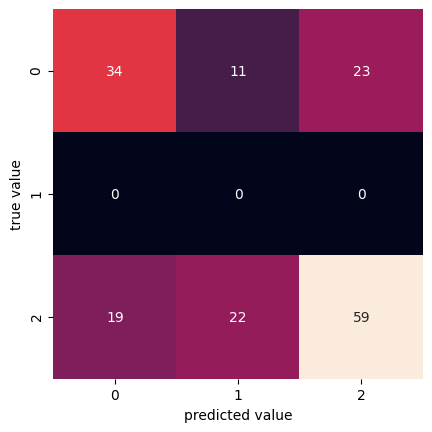

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_predTest, y_test)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Como a variância está muito alta, temos que tentar diminuir a quantidade de features do modelo para tentar melhorá-lo, tirando as 2 features menos importantes.

Para descobrir quais são, plotaremos um gráfico mostrando a importância de cada feature no resultado final




Text(0, 0.5, 'Features')

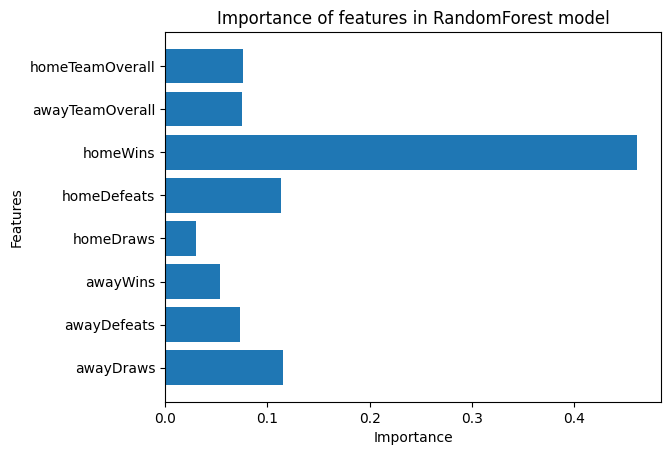

In [ ]:
feat_labels = [ 'homeTeamOverall', 'awayTeamOverall', 'homeWins', 'homeDefeats', 'homeDraws', 'awayWins', 'awayDefeats', 'awayDraws']
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh( feat_labels, clf.feature_importances_, align='center')
ax.invert_yaxis() 
ax.set_title('Importance of features in RandomForest model')
plt.xlabel('Importance')
plt.ylabel('Features')

Removendo as 2 colunas menos importantes para o modelo e separando o conjunto de testes, treinamento e validação novamente

In [ ]:
x = x.drop(columns = ['homeDraws', 'awayDraws'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Passando novamente o Optuna no Random Forest, dessa vez com mais parâmetros, para tentar otimizar ainda mais o modelo com o novo dataset

In [ ]:
def objectiveRand(trial): #Gerando função para retornar acurácia do modelo de Random forest, dessa vez com mais hiperparâmetros
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 criterion=criterion,
                                 max_features=max_features,
                                 min_samples_split=min_samples_split)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')# Maximizando hipermarâmetros
study.optimize(objectiveRand, n_trials=1000)# Tentando 200 vezes
trial = study.best_trial

#Testando a acurácia com os melhores valores de hiperparâmetros encontrados anteriormente
clf = RandomForestClassifier(n_estimators=trial.params['n_estimators'], max_depth=trial.params['max_depth'], criterion=trial.params['criterion'], max_features=trial.params['max_features'], min_samples_split=trial.params['min_samples_split'])
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predTrain = clf.predict(X_train)
#Guardando o valor da acurácia e os melhores parâmetros no dicionário para colocar no MLFlow

metrics['BestAccuracyTestDiagnosis'] = accuracy_score(y_test, y_pred)
metrics['BestAccuracyTrainDiagnosis'] = accuracy_score(y_train, y_predTrain)
params['BestParamsRandomForestDiagnosis'] = trial.params
print('Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: {}'.format(metrics['BestAccuracyTestDiagnosis']))
print('Acurácia no conjunto de treinamento do modelo Random Forest com hiperparâmetros otimizados: {}'.format(metrics['BestAccuracyTrainDiagnosis']))
print("Melhores hiperparâmetros: {}".format(trial.params))

[I 2020-11-12 21:04:27,908] A new study created in memory with name: no-name-548b80e0-3bf4-4301-b4a1-19c9accd7136
[I 2020-11-12 21:04:28,052] Trial 0 finished with value: 0.5535714285714286 and parameters: {'n_estimators': 80, 'max_depth': 23.7027553705793, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 9}. Best is trial 0 with value: 0.5535714285714286.
[I 2020-11-12 21:04:28,192] Trial 1 finished with value: 0.5178571428571429 and parameters: {'n_estimators': 67, 'max_depth': 15.775835016241174, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 4}. Best is trial 0 with value: 0.5535714285714286.
[I 2020-11-12 21:04:28,278] Trial 2 finished with value: 0.5178571428571429 and parameters: {'n_estimators': 42, 'max_depth': 17.619580707889636, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 6}. Best is trial 0 with value: 0.5535714285714286.
[I 2020-11-12 21:04:28,361] Trial 3 finished with value: 0.5773809523809523 and parameters

Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: 0.5059523809523809
Acurácia no conjunto de treinamento do modelo Random Forest com hiperparâmetros otimizados: 0.5836653386454184
Melhores hiperparâmetros: {'n_estimators': 3, 'max_depth': 3.9727038192378705, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 8}


## Bônus: **Autokeras**

Após fazermos esse diagnóstico e melhorarmos o modelo, iremos usar o Autokeras para que possamos comparar o modelo criado com um modelo automatizado de machine learning

In [ ]:
#Instalando o Autokeras
!pip install autokeras
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc3

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc3) to /tmp/pip-req-build-u3mwjawz
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-u3mwjawz
  Running command git checkout -q 172be42f1310cdbad48941494f84d65367de4f11
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc3-cp36-none-any.whl size=91635 sha256=43c7eef64ca2829f6445a77e1ae50a91fb914515c3fb2519d8bb247d4660709d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yboump6d/wheels/2d/b8/84/5f9abbcad32fc56a0fdd5d1b8c267221abb5ec582dde4371f7
Successfully built keras-tuner


In [ ]:
import tensorflow as tf
import autokeras as ak

#Treinando o autokeras com o conjunto de treinamento e avaliando a performance dele no conjunto de teste
clf = ak.StructuredDataClassifier()
clf.fit(x=X_train, y=y_train)
lossTest, accTest = clf.evaluate(X_test, y_test)
lossTrain, accTrain = clf.evaluate(X_train, y_train)

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. T

In [ ]:
#Fazendo a comparação entre o modelo criado e otimizado a partir da diagnose com o AutoKeras
print('Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: {}'.format(metrics['BestAccuracyTestDiagnosis']))
print('Acurácia no conjunto de treinamento do modelo Random Forest com hiperparâmetros otimizados: {}'.format(metrics['BestAccuracyTrainDiagnosis']))
print('Acurácia no conjunto de testes do AutoKeras: {}'.format(accTest))
print('Acurácia no conjunto de treinamento do AutoKeras: {}'.format(accTrain))

Acurácia no conjunto de testes do modelo Random Forest com hiperparâmetros otimizados: 0.5059523809523809
Acurácia no conjunto de treinamento do modelo Random Forest com hiperparâmetros otimizados: 0.5836653386454184
Acurácia no conjunto de testes do AutoKeras: 0.5357142686843872
Acurácia no conjunto de treinamento do AutoKeras: 0.5577689409255981
